<a href="https://colab.research.google.com/github/Rashida-Rangwala/Scaler_Unsupervised_ML/blob/main/Scaler_Casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Scaler**

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

**Problem Statement**

As a data scientist at Scaler working with the analytics vertical, I have to focus on profiling the best companies and job positions to work for from the Scaler database.

Data provided contains the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

**Scaler Case study uses the following concepts:**

1. Manual Clustering

2. Unsupervised Clustering - K- means, Hierarchical Clustering

In [345]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv
To: /content/scaler_clustering.csv
100% 24.7M/24.7M [00:00<00:00, 146MB/s] 


In [346]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Column Profiling:**

‘Unnamed 0’- Index of the dataset

Email_hash- Anonymised Personal Identifiable Information (PII)

Company_hash- Current employer of the learner

orgyear- Employment start date

CTC- Current CTC

Job_position- Job profile in the company

CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

# Exploratory Data Analysis

In [347]:
df = pd.read_csv("scaler_clustering.csv")

df.head(20)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0
5,5,yvuuxrj hzbvqqxta bvqptnxzs ucn rna,18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f2...,2018.0,700000,FullStack Engineer,2020.0
6,6,lubgqsvz wyvot wg,9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c4128...,2018.0,1500000,FullStack Engineer,2019.0
7,7,vwwtznhqt ntwyzgrgsj,756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0...,2019.0,400000,Backend Engineer,2019.0
8,8,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...,2020.0,450000,NaN,2019.0
9,9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019.0,360000,NaN,2019.0


In [348]:
df.shape

(205843, 7)

Data provided contains -

Features : 7

Rows : 205843

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


There are some null values in company_hash, orgyear, job_position columns.
We need to work on imputing the data and remove the NULL values.

In [350]:
df.describe()

,Unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000


Dropping the "Unnamed: 0" column as it represents the Index column and is a repetition in the dataset as we already have Index column provided by pandas.

In [351]:
df.drop(columns = ["Unnamed: 0"], inplace=True)

In [352]:
df.describe(include=[np.object])

<ipython-input-352-554b7518cb2b>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object])


,company_hash,email_hash,job_position
count,205799,205843,153281
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


In [353]:
df.isnull().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

**Missing Value Treatment**

Job_position has the maximum missing values - 52562. So, we will impute this column.


Company hash has 44 and Org year has 86 missing values. This is comparatively a very small value so dropping these rows with NA/nulls.

In [354]:
df.dropna(subset = ["company_hash","orgyear"], inplace=True)

In [355]:
df.orgyear.value_counts()

2018.0    25247
2019.0    23420
2017.0    23234
2016.0    23042
2015.0    20606
          ...  
2107.0        1
1972.0        1
2101.0        1
208.0         1
200.0         1
Name: orgyear, Length: 77, dtype: int64

In [356]:
df.nunique()

company_hash         37274
email_hash          153333
orgyear                 77
ctc                   3359
job_position          1017
ctc_updated_year         7
dtype: int64

In [357]:
df["company_hash"].value_counts()

nvnv wgzohrnvzwj otqcxwto    8335
xzegojo                      5381
vbvkgz                       3480
zgn vuurxwvmrt vwwghzn       3411
wgszxkvzn                    3239
                             ... 
vhngsqxa xzaxv                  1
ctavznh td kteg                 1
ihxwprgsxw ogenfvqt             1
onvqmhwpo                       1
bvptbjnqxu td vbvkgz            1
Name: company_hash, Length: 37274, dtype: int64

In [358]:
df["email_hash"].value_counts()

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c     8
                                                                    ..
9a891d279335db60cd6a45c2243bca2c56f940e31c5a812a6f642ea800832c4b     1
e96207e084f4552ba131598c704d2c5f12373999fc66285f58dea00afb9d333c     1
09102244a24ed7ae3beff197e3bfa8402f2d72dc69e1fa5bee18d9fc5d6aeeae     1
bc51538e8265ba631bafe120d53a17ac4aac9232127285e5c9fa09117af2c68f     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: email_hash, Length: 153333, dtype: int64

In [359]:
df["job_position"].value_counts()

Backend Engineer                  43540
FullStack Engineer                24706
Other                             18058
Frontend Engineer                 10412
Engineering Leadership             6867
                                  ...  
ayS                                   1
Principal Product Engineer            1
Senior Director of Engineering        1
Seller Support Associate              1
Android Application developer         1
Name: job_position, Length: 1017, dtype: int64

In [360]:
def calculate_yoe(orgyear,ctc_updated_year):
 if orgyear==0.0 or pd.isnull(orgyear):
  return ctc_updated_year
 elif orgyear < ctc_updated_year:
  return ctc_updated_year - orgyear
 else:
  return orgyear - ctc_updated_year

df['orgyear'] = df['orgyear'].astype(str).str[:4]
df['orgyear'] = df['orgyear'].astype(float)
df["yoe"] = df.apply(lambda x:calculate_yoe(x["orgyear"],x["ctc_updated_year"]),axis = 1)

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205713 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205713 non-null  object 
 1   email_hash        205713 non-null  object 
 2   orgyear           205713 non-null  float64
 3   ctc               205713 non-null  int64  
 4   job_position      153206 non-null  object 
 5   ctc_updated_year  205713 non-null  float64
 6   yoe               205713 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 12.6+ MB


In [362]:
(df.isna().sum()/df.shape[0])*100

company_hash         0.000000
email_hash           0.000000
orgyear              0.000000
ctc                  0.000000
job_position        25.524396
ctc_updated_year     0.000000
yoe                  0.000000
dtype: float64

In [363]:
mask = df["company_hash"]==""
df=df[~mask]

In [364]:
(df.isna().sum()/df.shape[0])*100

company_hash         0.000000
email_hash           0.000000
orgyear              0.000000
ctc                  0.000000
job_position        25.524396
ctc_updated_year     0.000000
yoe                  0.000000
dtype: float64

Job position is a categorical data and it is imputed using the Company hash, ctc and year of experience column. As there is a strong relationship between these columns.

In [365]:
from sklearn.impute import KNNImputer, SimpleImputer

# Define the imputer with appropriate parameters
imputer = SimpleImputer(strategy="most_frequent")

# Subset the relevant columns for imputation
cols_for_imputation = ["job_position", "company_hash", "ctc", "yoe"]

# Fit the imputer and transform the data
imputed_data = imputer.fit_transform(df[cols_for_imputation])

# Update the original dataset with imputed values
df[cols_for_imputation] = imputed_data

# Handle data type for job_position
df["job_position"] = df["job_position"].astype("category")

In [366]:
df[['ctc', 'yoe']] = df[['ctc', 'yoe']].apply(pd.to_numeric)

In [367]:
df['yoe'].value_counts()

1.0       29533
2.0       29220
3.0       26623
4.0       23154
5.0       19183
          ...  
1815.0        1
2015.0        1
44.0          1
51.0          1
1819.0        1
Name: yoe, Length: 67, dtype: int64

Clearly there are some records having messed up Years of experience because their orgyear column was recorded incorrectly.

Therefore, we are looking at the data of employees having maximum 35 years of experience only.

In [368]:
mask = df["yoe"]>35.0
df=df[~mask]
#pd.set_option('display.max_rows', None)
df["yoe"].value_counts()

1.0     29533
2.0     29220
3.0     26623
4.0     23154
5.0     19183
6.0     15092
0.0     14270
7.0     11689
8.0      8661
9.0      6605
10.0     4858
11.0     3475
12.0     2644
13.0     2149
14.0     1863
15.0     1514
16.0     1188
17.0      885
18.0      683
19.0      595
20.0      538
21.0      334
22.0      239
23.0      159
24.0       98
26.0       82
25.0       76
30.0       76
28.0       52
27.0       45
29.0       40
31.0       10
33.0        6
32.0        4
35.0        4
34.0        3
Name: yoe, dtype: int64

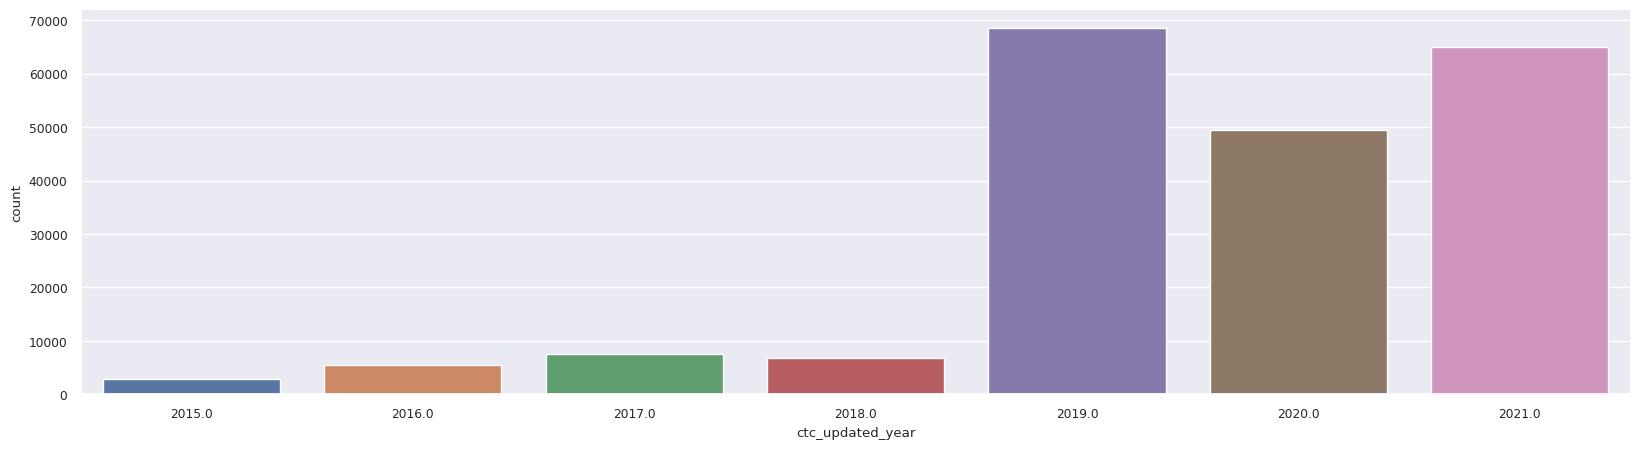

In [369]:
plt.figure(figsize = (20,5))
sns.countplot(x = "ctc_updated_year", data=df)
plt.show()

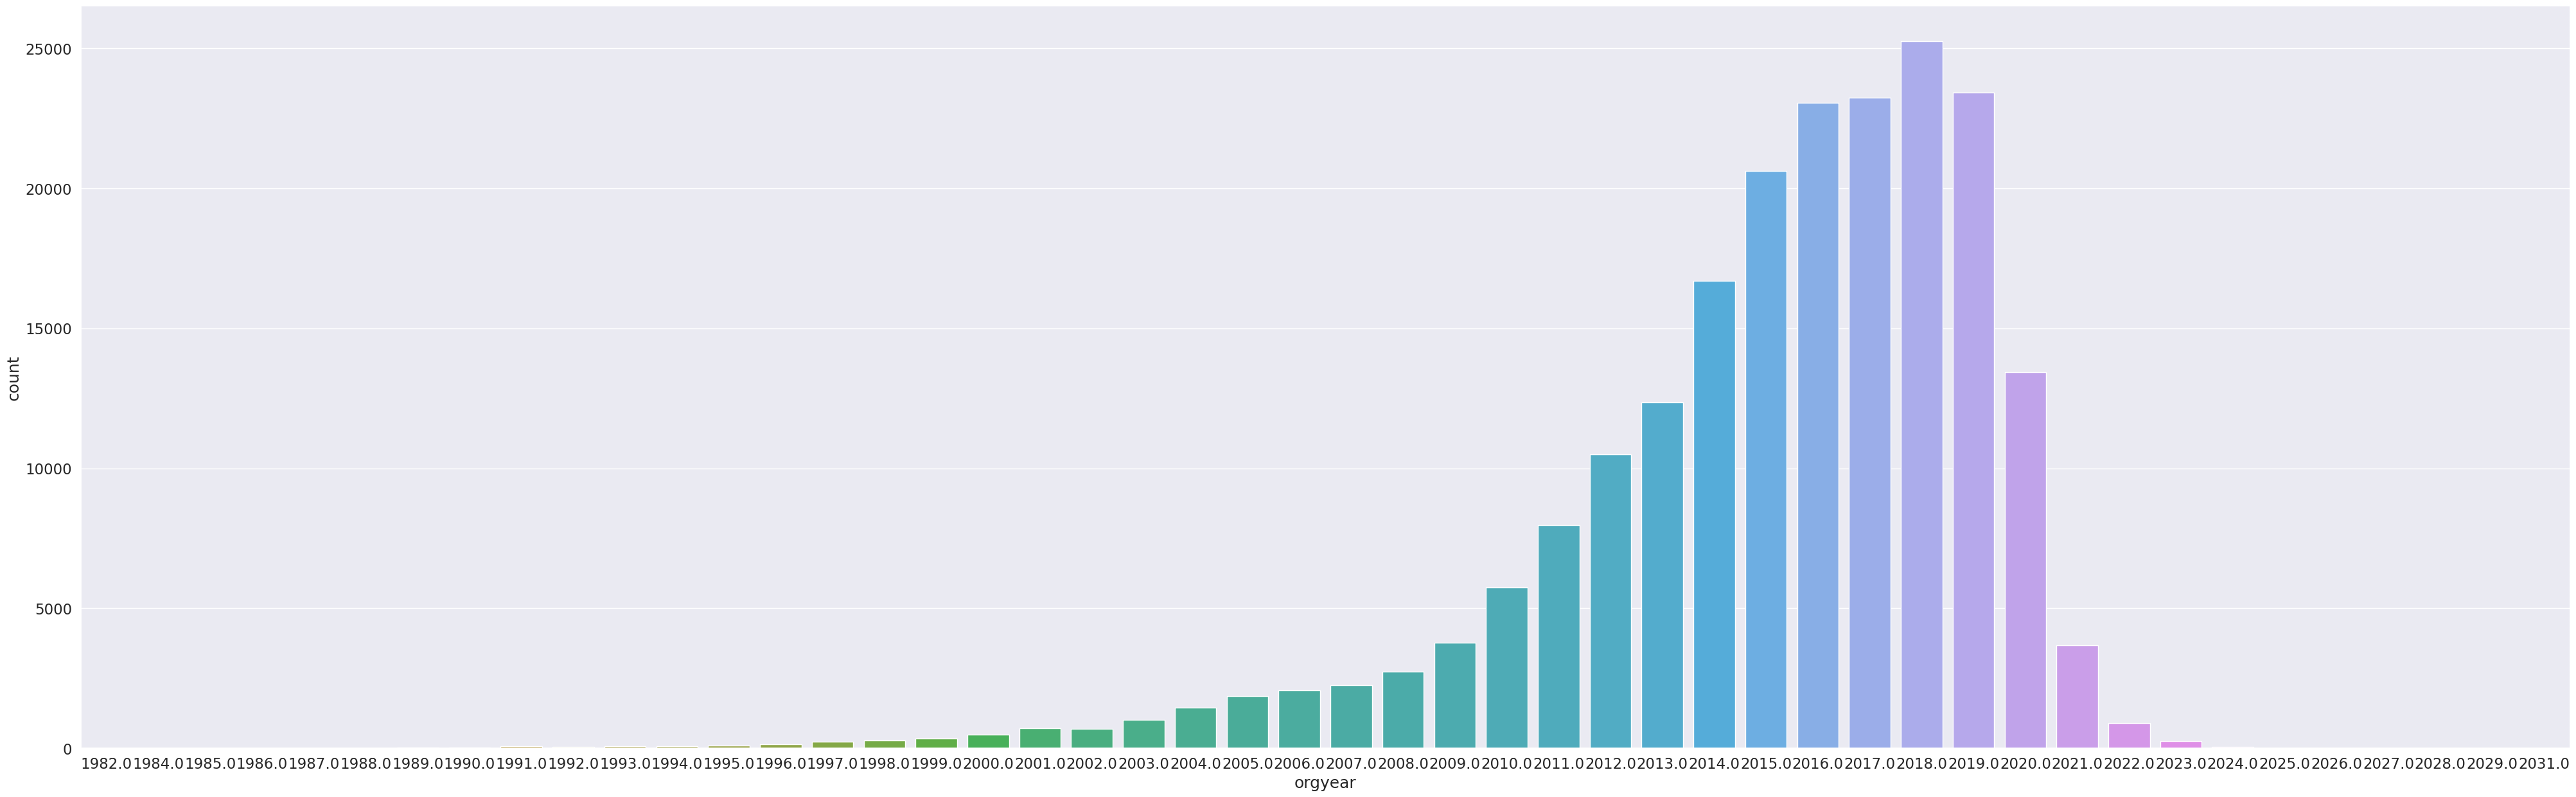

In [370]:
sns.set(font_scale=1.5)
plt.figure(figsize = (50,15))
sns.countplot(x = "orgyear", data=df)
plt.show()

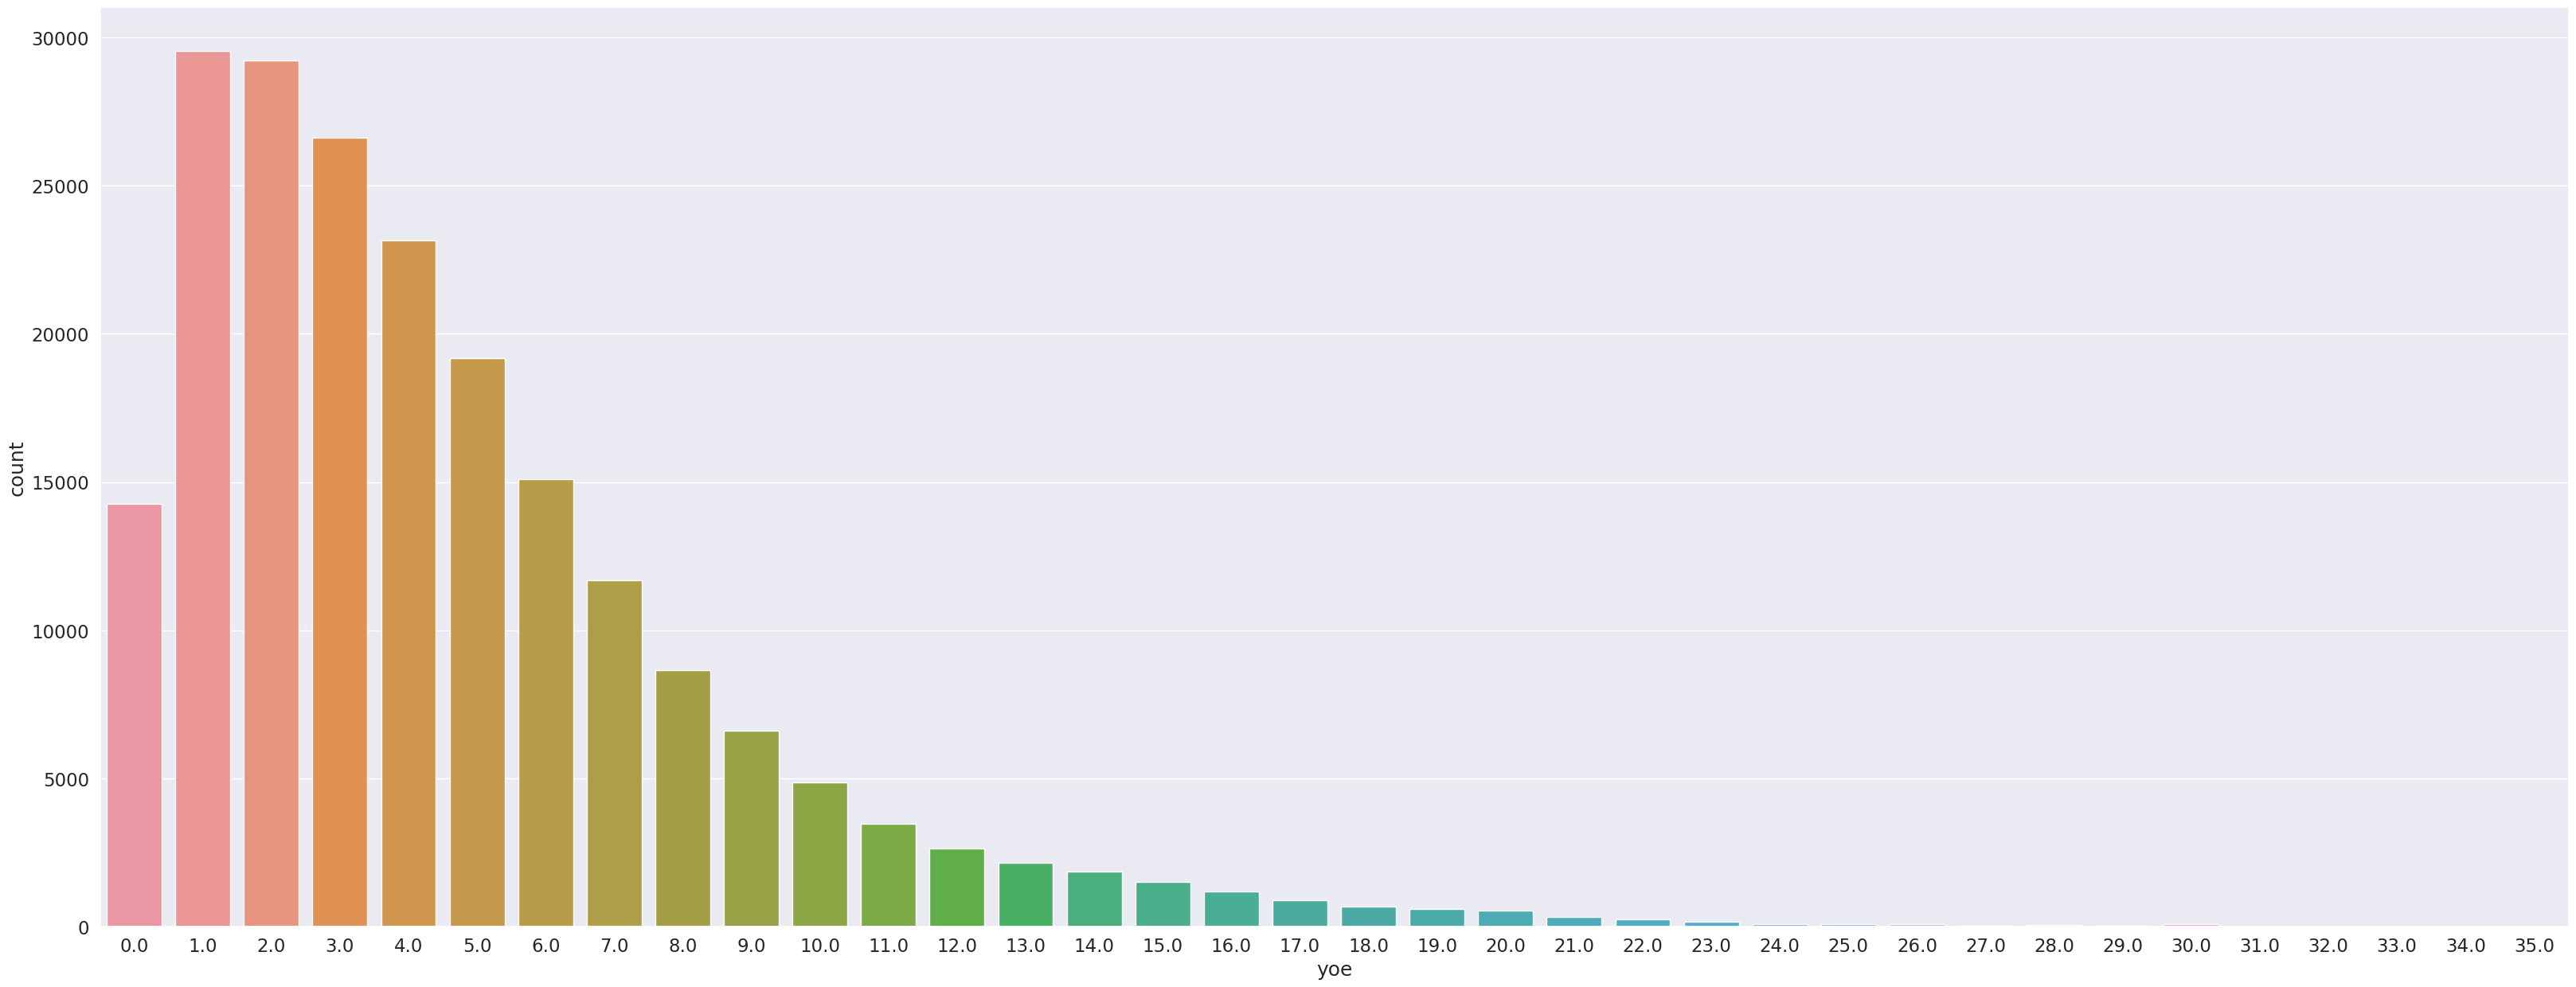

In [371]:
sns.set(font_scale=1.5)
plt.figure(figsize = (40,15))
sns.countplot(x = "yoe", data=df)
plt.show()

In [372]:
df["yoe"].value_counts()

1.0     29533
2.0     29220
3.0     26623
4.0     23154
5.0     19183
6.0     15092
0.0     14270
7.0     11689
8.0      8661
9.0      6605
10.0     4858
11.0     3475
12.0     2644
13.0     2149
14.0     1863
15.0     1514
16.0     1188
17.0      885
18.0      683
19.0      595
20.0      538
21.0      334
22.0      239
23.0      159
24.0       98
26.0       82
25.0       76
30.0       76
28.0       52
27.0       45
29.0       40
31.0       10
33.0        6
32.0        4
35.0        4
34.0        3
Name: yoe, dtype: int64

Years of experience (yoe) column is sufficient to now convey the information about the orgyear and ctc updated year column so dropping these columns to remove redundant data.

In [373]:
import re
df["company_hash"].head()
df['company_hash'] = df['company_hash'].astype(str)
df['company_hash'] = df['company_hash'].map(lambda a: re.sub('[^A-Za-z0-9 ]+', '', a))

In [374]:
df['job_position'] = df['job_position'].astype(str)
df['job_position'] = df['job_position'].map(lambda a: re.sub('[^A-Za-z0-9 ]+', '', a))

In [375]:
df_original = df.copy()

In [376]:
#df.drop(columns = ["ctc_updated_year", "orgyear"], inplace=True)

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205650 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205650 non-null  object 
 1   email_hash        205650 non-null  object 
 2   orgyear           205650 non-null  float64
 3   ctc               205650 non-null  int64  
 4   job_position      205650 non-null  object 
 5   ctc_updated_year  205650 non-null  float64
 6   yoe               205650 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 12.6+ MB


# **FEATURE CREATION -**

**TIER :**
Creating the tier feature based on the Company and the Ctc column.

Here, 1= Highest paid - Above 75 percentile,

2 = Second highest level - Between 50 to 75 percentile,

3 = Lower than 50 percentile but more than 25 percentile,

4 = Last bracket where people are earning less than 25 percentile of the company population

In [378]:
q75 = df.groupby("company_hash")["ctc"].quantile(0.75).to_frame().reset_index()
q50 = df.groupby("company_hash")["ctc"].quantile(0.50).to_frame().reset_index()
q25 = df.groupby("company_hash")["ctc"].quantile(0.25).to_frame().reset_index()

In [379]:
q75.rename(columns = {"ctc": "company_ctc_75"}, inplace = True)

In [380]:
df = df.merge(q75, on="company_hash", how="left")

In [381]:
q50.rename(columns = {"ctc": "company_ctc_50"}, inplace = True)

In [382]:
df = df.merge(q50, on="company_hash", how="left")

In [383]:
q25.rename(columns = {"ctc": "company_ctc_25"}, inplace = True)

In [384]:
df = df.merge(q25, on="company_hash", how="left")

In [385]:
df

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,company_ctc_75,company_ctc_50,company_ctc_25
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0,4.0,1500000.0,1070000.0,800000.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0,1.0,1688750.0,900000.0,600000.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0,5.0,2000000.0,2000000.0,2000000.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0,2.0,2000000.0,1400000.0,1100000.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0,2.0,1300000.0,850000.0,625000.0
...,...,...,...,...,...,...,...,...,...,...
205645,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,Backend Engineer,2019.0,11.0,2700000.0,2300000.0,220000.0
205646,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,Backend Engineer,2020.0,3.0,1800000.0,1200000.0,900000.0
205647,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,Backend Engineer,2021.0,0.0,1500000.0,1300000.0,1000000.0
205648,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,Backend Engineer,2019.0,0.0,1500000.0,800000.0,360000.0


In [386]:
def tier_flag(ctc, ctc_75, ctc_50, ctc_25):
  if ctc >= ctc_75:
    flag = 1
  elif ctc < ctc_75 and ctc >= ctc_50:
    flag = 2
  elif ctc < ctc_50 and ctc >= ctc_25:
    flag = 3
  else:
    flag = 4
  return flag

df["tier"] = df.apply(lambda x:tier_flag(x["ctc"], x["company_ctc_75"], x["company_ctc_50"], x["company_ctc_25"]),axis = 1)

In [387]:
df["tier"].value_counts()

1    83285
2    42161
4    40794
3    39410
Name: tier, dtype: int64

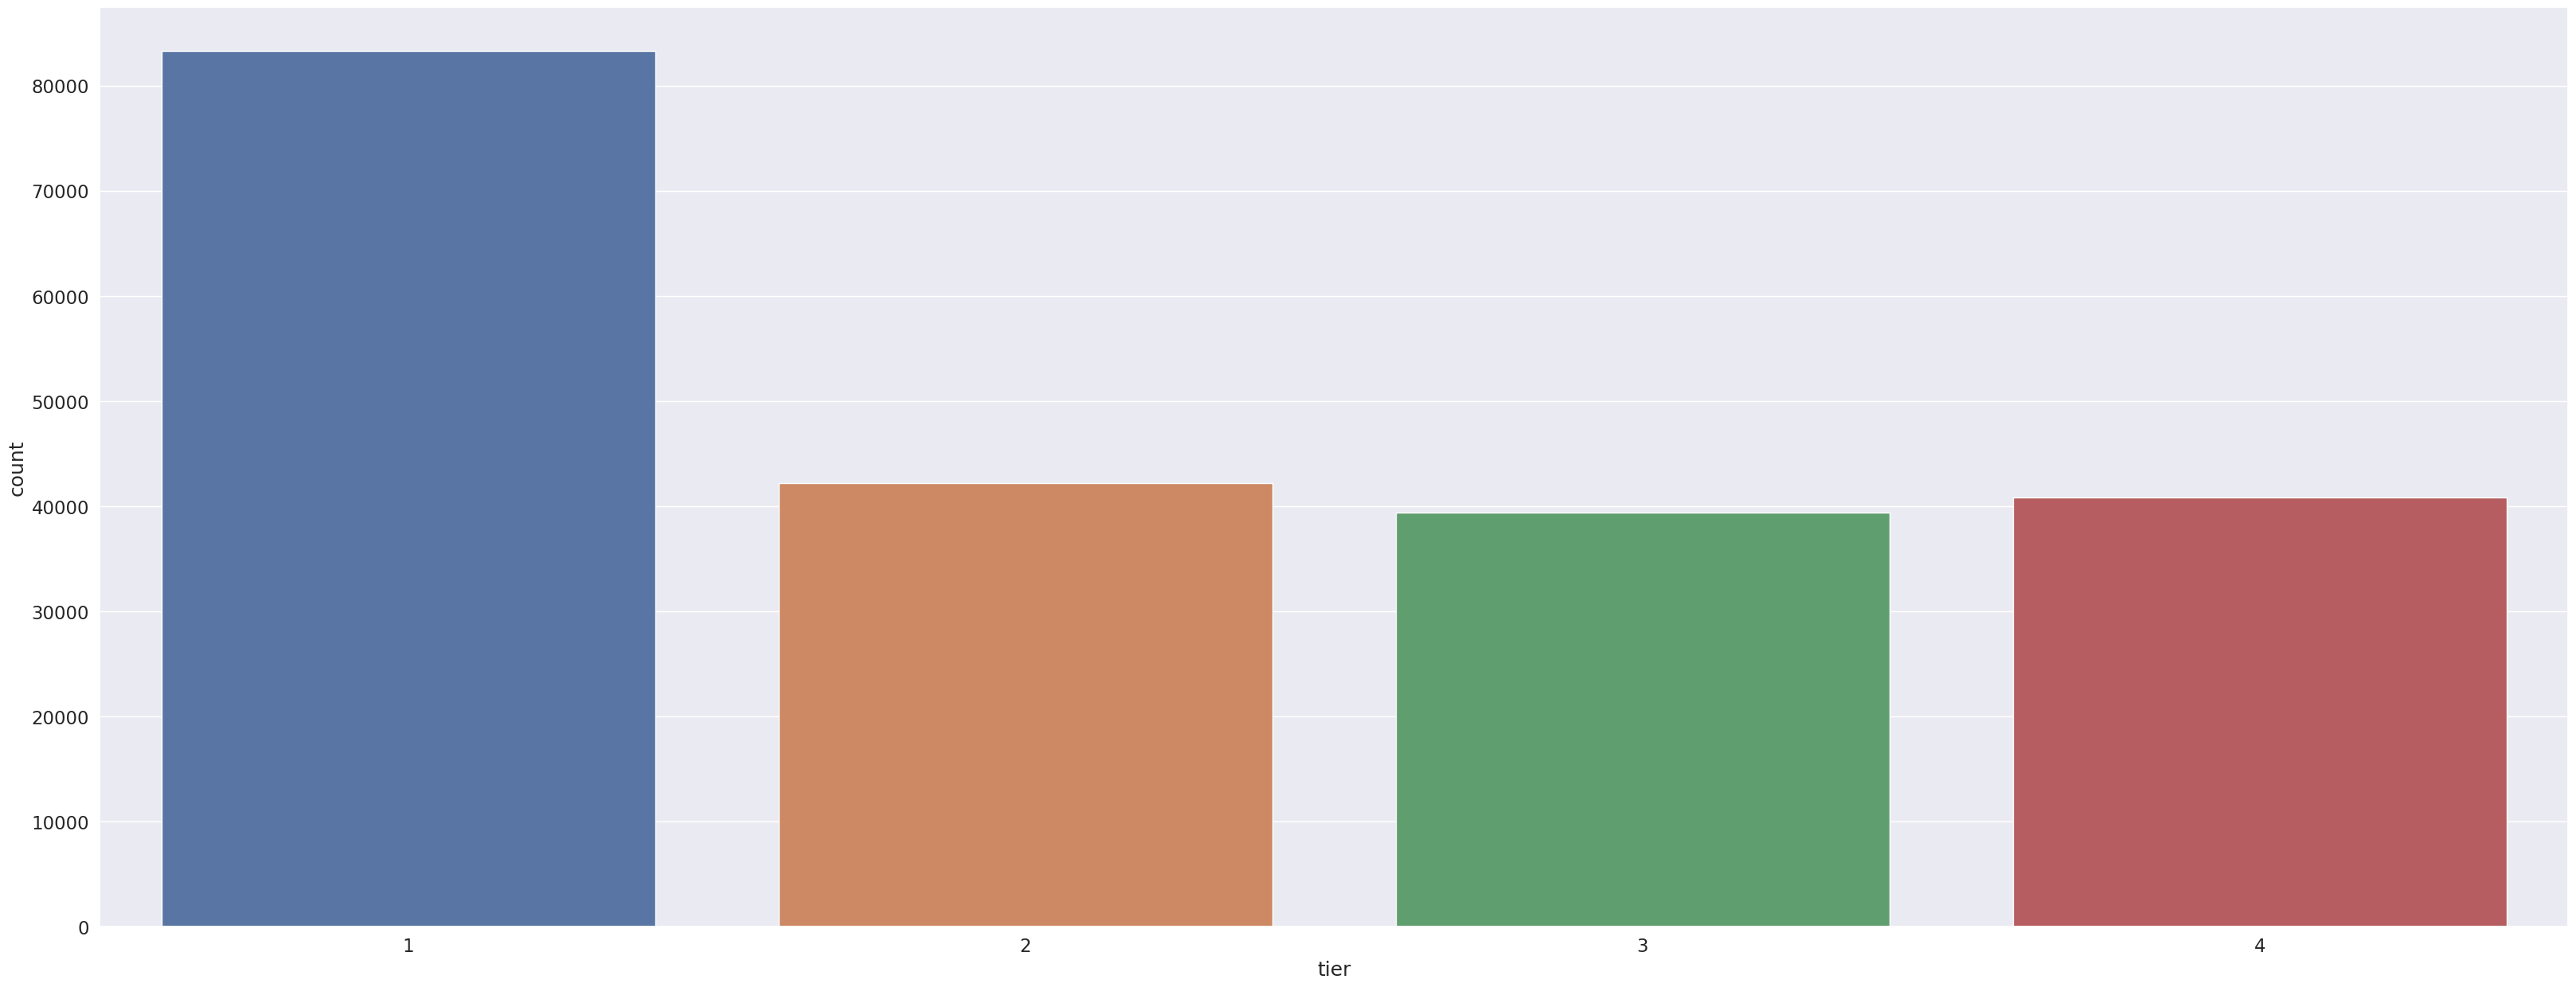

In [388]:
sns.set(font_scale=1.5)
plt.figure(figsize = (40,15))
sns.countplot(x = "tier", data=df)
plt.show()

In [389]:
df.drop(columns = ["company_ctc_75", "company_ctc_50", "company_ctc_25"], inplace=True)

**CLASS flag :**
Company and Job position level

In [390]:
q75 = df.groupby(["company_hash", "job_position"])["ctc"].quantile(0.75).to_frame().reset_index()
q75.rename(columns = {"ctc": "company_job_ctc_75"}, inplace = True)
df = df.merge(q75, on=["company_hash", "job_position"], how="left")

In [391]:
q50 = df.groupby(["company_hash", "job_position"])["ctc"].quantile(0.50).to_frame().reset_index()
q50.rename(columns = {"ctc": "company_job_ctc_50"}, inplace = True)
df = df.merge(q50, on=["company_hash", "job_position"], how="left")

In [392]:
q25 = df.groupby(["company_hash", "job_position"])["ctc"].quantile(0.25).to_frame().reset_index()
q25.rename(columns = {"ctc": "company_job_ctc_25"}, inplace = True)
df = df.merge(q25, on=["company_hash", "job_position"], how="left")

In [393]:
def class_flag(ctc, ctc_75, ctc_50, ctc_25):
  if ctc >= ctc_75:
    flag = 1
  elif ctc < ctc_75 and ctc >= ctc_50:
    flag = 2
  elif ctc < ctc_50 and ctc >= ctc_25:
    flag = 3
  else:
    flag = 4
  return flag

df["class"] = df.apply(lambda x:class_flag(x["ctc"], x["company_job_ctc_75"], x["company_job_ctc_50"], x["company_job_ctc_25"]),axis = 1)

In [394]:
df["class"].value_counts()

1    99556
4    38701
2    35875
3    31518
Name: class, dtype: int64

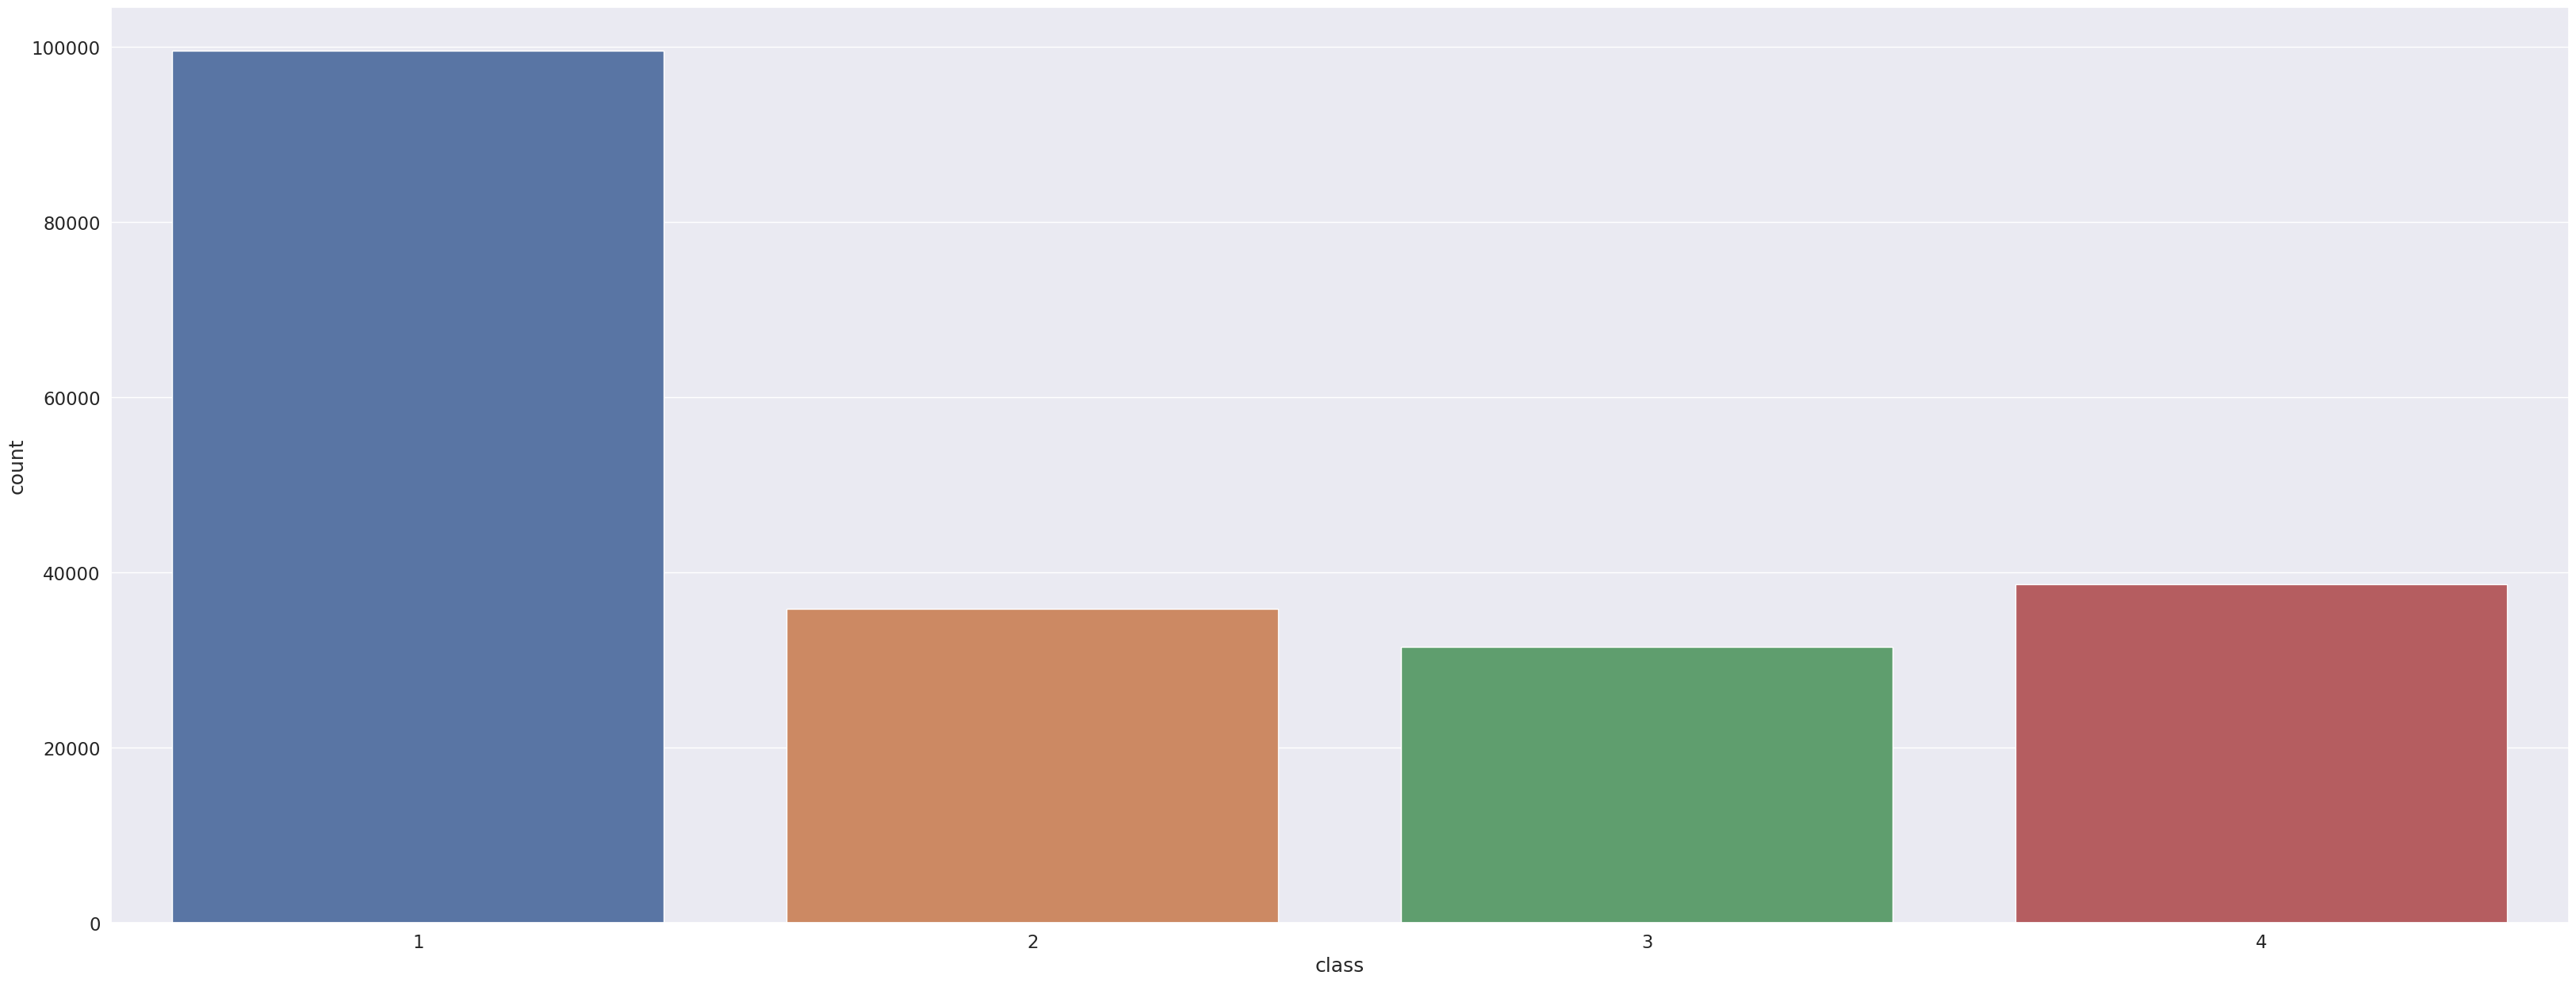

In [395]:
sns.set(font_scale=1.5)
plt.figure(figsize = (40,15))
sns.countplot(x = "class", data=df)
plt.show()

In [396]:
df.drop(columns = ["company_job_ctc_75", "company_job_ctc_50", "company_job_ctc_25"], inplace=True)

**Designation flag :**

This flag is to compare professionals in the same company and job position and having same year of experience.

In [397]:
#q75 = df.groupby(["company_hash", "job_position","yoe"])["ctc"].quantile(0.75).to_frame().reset_index()

In [398]:
#q75.rename(columns = {"ctc": "company_job_yoe_ctc_75"}, inplace = True)

In [399]:
#df = df.merge(q75, on=["company_hash", "job_position", "yoe"], how="left")

In [400]:
#q50 = df.groupby(["company_hash", "job_position","yoe"])["ctc"].quantile(0.50).to_frame().reset_index()

In [401]:
#q50.rename(columns = {"ctc": "company_job_yoe_ctc_50"}, inplace = True)

In [402]:
#df = df.merge(q50, on=["company_hash", "job_position", "yoe"], how="left")

In [403]:
#q25 = df.groupby(["company_hash", "job_position","yoe"])["ctc"].quantile(0.25).to_frame().reset_index()

In [404]:
#q25.rename(columns = {"ctc": "company_job_yoe_ctc_25"}, inplace = True)

In [405]:
#df = df.merge(q25, on=["company_hash", "job_position", "yoe"], how="left")

In [406]:
# def designation_flag(ctc, ctc_75, ctc_50, ctc_25):
#   if ctc >= ctc_75:
#     flag = 1
#   elif ctc < ctc_75 and ctc >= ctc_50:
#     flag = 2
#   elif ctc < ctc_50 and ctc >= ctc_25:
#     flag = 3
#   else:
#     flag = 4
#   return flag

# df["designation"] = df.apply(lambda x:designation_flag(x["ctc"], x["company_job_yoe_ctc_75"], x["company_job_yoe_ctc_50"], x["company_job_yoe_ctc_25"]),axis = 1)

In [407]:
#df["designation"].value_counts()

In [408]:
# sns.set(font_scale=1.5)
# plt.figure(figsize = (40,15))
# sns.countplot(x = "designation", data=df)
# plt.show()

In [409]:
#df.drop(columns = ["company_job_yoe_ctc_75", "company_job_yoe_ctc_50", "company_job_yoe_ctc_25"], inplace=True)

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205650 entries, 0 to 205649
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205650 non-null  object 
 1   email_hash        205650 non-null  object 
 2   orgyear           205650 non-null  float64
 3   ctc               205650 non-null  int64  
 4   job_position      205650 non-null  object 
 5   ctc_updated_year  205650 non-null  float64
 6   yoe               205650 non-null  float64
 7   tier              205650 non-null  int64  
 8   class             205650 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 15.7+ MB






Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X
Top 10 companies (based on their CTC)
Top 2 positions in every company (based on their CTC)

**Top 10 employees (earning more than most of the employees in the company) - Tier 1**

In [411]:
#Top 10 employees (earning more than most of the employees in the company) - Tier 1

df.loc[df['tier'] == 1].nlargest(n=10, columns=['ctc'])


,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,tier,class
72739,whmxw rgsxwo uqxcvnt rxbxnta,29a71dd13adf6d2d497571a565bb3096cf66cb46cd1ece...,2015.0,1000150000,Backend Engineer,2020.0,5.0,1,1
117509,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,2018.0,255555555,Backend Engineer,2016.0,2.0,1,1
3294,aveegaxr xzntqzvnxgzvr hzxctqoxnj,06d231f167701592a69cdd7d5c825a0f5b30f0347a4078...,2021.0,250000000,Backend Engineer,2020.0,1.0,1,1
106,oxburjyq ogrhnxgzo rru,996aef9bba62bd99d6cb8e8c112c0ec8096b203ae50b97...,2017.0,200000000,Support Engineer,2020.0,3.0,1,1
301,ihvrxnvo srgmvr rru,2b649949f0a00c444db6ae38d66a972e37cc3a90ba65a0...,2017.0,200000000,QA Engineer,2020.0,3.0,1,1
361,uvqp wgbuhntq ojontb xzw,e1dfef2de8d773780471295f756a0c2957cbe368e33216...,2014.0,200000000,Engineering Leadership,2019.0,5.0,1,1
487,xfgqp ntwyzgrgsxto,eda5097c113cc6e8ff663ca9764c78e35d3eec75bdcea9...,2014.0,200000000,QA Engineer,2020.0,6.0,1,1
602,xzegojo,4368cc6185184b811c3a4b9cef05dd1e45a682a6e94056...,2017.0,200000000,Backend Engineer,2020.0,3.0,1,1
691,outwnqt vzvrjnxwv,dfdb45fb9631b9064a94be87a27a621068530ac1f3807c...,2017.0,200000000,Other,2020.0,3.0,1,1
720,twgbtduqtoo,261f76b9954ebe5e6dc102b0cd5847354cf27112f8a422...,2015.0,200000000,Frontend Engineer,2020.0,5.0,1,1


**Top 10 employees of data science in Amazon / TCS etc earning more than their peers - Class 1**

In [412]:
df.loc[df['class'] == 1].nlargest(n=10, columns=['ctc'])

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,tier,class
72739,whmxw rgsxwo uqxcvnt rxbxnta,29a71dd13adf6d2d497571a565bb3096cf66cb46cd1ece...,2015.0,1000150000,Backend Engineer,2020.0,5.0,1,1
117509,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,2018.0,255555555,Backend Engineer,2016.0,2.0,1,1
3294,aveegaxr xzntqzvnxgzvr hzxctqoxnj,06d231f167701592a69cdd7d5c825a0f5b30f0347a4078...,2021.0,250000000,Backend Engineer,2020.0,1.0,1,1
106,oxburjyq ogrhnxgzo rru,996aef9bba62bd99d6cb8e8c112c0ec8096b203ae50b97...,2017.0,200000000,Support Engineer,2020.0,3.0,1,1
301,ihvrxnvo srgmvr rru,2b649949f0a00c444db6ae38d66a972e37cc3a90ba65a0...,2017.0,200000000,QA Engineer,2020.0,3.0,1,1
361,uvqp wgbuhntq ojontb xzw,e1dfef2de8d773780471295f756a0c2957cbe368e33216...,2014.0,200000000,Engineering Leadership,2019.0,5.0,1,1
487,xfgqp ntwyzgrgsxto,eda5097c113cc6e8ff663ca9764c78e35d3eec75bdcea9...,2014.0,200000000,QA Engineer,2020.0,6.0,1,1
602,xzegojo,4368cc6185184b811c3a4b9cef05dd1e45a682a6e94056...,2017.0,200000000,Backend Engineer,2020.0,3.0,1,1
691,outwnqt vzvrjnxwv,dfdb45fb9631b9064a94be87a27a621068530ac1f3807c...,2017.0,200000000,Other,2020.0,3.0,1,1
720,twgbtduqtoo,261f76b9954ebe5e6dc102b0cd5847354cf27112f8a422...,2015.0,200000000,Frontend Engineer,2020.0,5.0,1,1


**Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers - Class 4**

In [413]:
df.loc[df['class'] == 4].nsmallest(n=10, columns=['ctc'])

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,tier,class
135299,xzntqcxtfmxn,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2014.0,2,Backend Engineer,2019.0,5.0,4,4
118108,xzntqcxtfmxn,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,2013.0,6,Backend Engineer,2018.0,5.0,4,4
114040,xzntqcxtfmxn,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,2013.0,14,Backend Engineer,2018.0,5.0,4,4
184761,xm,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,2016.0,15,Backend Engineer,2018.0,2.0,4,4
99306,gjg,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,2018.0,600,FullStack Engineer,2021.0,3.0,4,4
150534,zvz,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...,2023.0,600,Backend Engineer,2019.0,4.0,4,4
171028,nvnv wgzohrnvzwj otqcxwto,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,2012.0,600,Backend Engineer,2017.0,5.0,4,4
3395,bgqsvz onvzrtj,78eaccdfacf1b3d73037a6e86451d6424369c0d426feb4...,2011.0,1000,Backend Engineer,2020.0,9.0,4,4
10528,zgzt,3ad2638a1ca2f437ae103ebd84905c78aa6735bdabb3df...,2020.0,1000,Other,2020.0,0.0,4,4
38509,zv,8747d9599e2ba1a8624e8bea834ab7a870c89ccca74204...,2004.0,1000,Other,2018.0,14.0,4,4


In [414]:
df.loc[df['class'] == 3].nsmallest(n=10, columns=['ctc'])

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,tier,class
131351,rs trtwnqgzxwo,fb7aed102f0cedb9a69cd487edd0e21fc954172f858804...,2010.0,12000,Backend Engineer,2019.0,9.0,4,3
163324,rs trtwnqgzxwo,fb7aed102f0cedb9a69cd487edd0e21fc954172f858804...,2010.0,12000,Backend Engineer,2019.0,9.0,4,3
16465,vqqgf trtwnqgzxwo,9989dc02c77e5330cf66fdf75f6ceff7a6d90672868254...,2005.0,17400,Backend Engineer,2019.0,14.0,3,3
61452,xucxoxgz wvzvav xzw,87a3b58732dc4d3201458828efa127f5a4a4d4313cee8e...,2013.0,24000,Backend Engineer,2017.0,4.0,4,3
187989,tlvav,cfb24ab354dcea3c5bfe6678486cce19021ebe2fbc21cd...,2016.0,28000,Backend Engineer,2019.0,3.0,3,3
156828,x vb v eqttrvzwtq,71a19039bd762d26dca2357521cd857c3e87a6eea5c1b5...,2017.0,35000,Data Analyst,2021.0,4.0,4,3
115952,jvzatd,6e4aa98f4deb55f95f0934474406ae58380a38471a40b8...,2016.0,40000,Backend Engineer,2017.0,1.0,4,3
162303,jvzatd,26369b3180d2449e6723cfe84db5463f01cb9189506c23...,2007.0,40000,Backend Engineer,2016.0,9.0,4,3
176520,gqvzst,cf25def48afd732b7602aea850f4375e9afee787303cfe...,2012.0,40000,Backend Engineer,2017.0,5.0,4,3
164546,jvzatd,c29315bca2b9b3f344e6a31e270715e48a9a943263ca71...,2009.0,42000,Backend Engineer,2017.0,8.0,3,3


**Bottom 10 employees (earning less than most of the employees in the company)- Tier 3**

In [415]:
df.loc[df['tier'] == 3].nsmallest(n=10, columns=['ctc'])

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,tier,class
96017,azts,79fe8882e7ea5ace40dc781ccbcb0ee10ddd79e98b0901...,2018.0,3000,Other,2019.0,1.0,3,4
119134,azts,79fe8882e7ea5ace40dc781ccbcb0ee10ddd79e98b0901...,2018.0,3000,Engineering Intern,2019.0,1.0,3,1
4760,ujnygz,e45b83147e1e3f040fb90eab4c6d70b5fa49a1ecd916a4...,2015.0,4300,Other,2019.0,4.0,3,1
28636,ujnygz,e45b83147e1e3f040fb90eab4c6d70b5fa49a1ecd916a4...,2015.0,4300,Backend Engineer,2019.0,4.0,3,4
5348,wavw mvzsvrgqt,5f1dcae07b7d2eb2687c11442efbda783ebce078ed918a...,2018.0,4500,Research Engineers,2019.0,1.0,3,4
31369,wavw mvzsvrgqt,5f1dcae07b7d2eb2687c11442efbda783ebce078ed918a...,2018.0,4500,Backend Engineer,2019.0,1.0,3,1
188206,opvcv ojontbo ucn rna,fed4b1fb5b595c99e1f7dc8f8df0a95c6ee694032d7c2a...,2016.0,5200,Android Engineer,2019.0,3.0,3,1
198201,opvcv ojontbo ucn rna,fed4b1fb5b595c99e1f7dc8f8df0a95c6ee694032d7c2a...,2016.0,5200,Frontend Engineer,2019.0,3.0,3,1
82609,vzjwgzztwn,293c762354f5c21dd6bcbb823e7baeb62597b0ab674a64...,2019.0,7000,Research Engineers,2019.0,0.0,3,1
85202,vzjwgzztwn,6409ec8a9948a5dccf71c7db3dd145503d395c0f1a4daa...,2017.0,7000,Backend Engineer,2019.0,2.0,3,4


In [416]:
df.loc[df['tier'] == 4].nsmallest(n=10, columns=['ctc'])

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,tier,class
135299,xzntqcxtfmxn,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,2014.0,2,Backend Engineer,2019.0,5.0,4,4
118108,xzntqcxtfmxn,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,2013.0,6,Backend Engineer,2018.0,5.0,4,4
114040,xzntqcxtfmxn,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,2013.0,14,Backend Engineer,2018.0,5.0,4,4
184761,xm,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,2016.0,15,Backend Engineer,2018.0,2.0,4,4
116822,hzxctqoxnj ge fvoyxzsngz,f7e5e788676100d7c4146740ada9e2f8974defc01f571d...,2022.0,200,Backend Engineer,2021.0,1.0,4,1
99306,gjg,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,2018.0,600,FullStack Engineer,2021.0,3.0,4,4
150534,zvz,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...,2023.0,600,Backend Engineer,2019.0,4.0,4,4
171028,nvnv wgzohrnvzwj otqcxwto,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,2012.0,600,Backend Engineer,2017.0,5.0,4,4
3395,bgqsvz onvzrtj,78eaccdfacf1b3d73037a6e86451d6424369c0d426feb4...,2011.0,1000,Backend Engineer,2020.0,9.0,4,4
10528,zgzt,3ad2638a1ca2f437ae103ebd84905c78aa6735bdabb3df...,2020.0,1000,Other,2020.0,0.0,4,4


**Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X**

In [417]:
df.loc[(df['yoe'] == 5) | (df['yoe'] == 6) | (df['yoe'] == 7)].nlargest(n=10, columns=['ctc'])

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,tier,class
72739,whmxw rgsxwo uqxcvnt rxbxnta,29a71dd13adf6d2d497571a565bb3096cf66cb46cd1ece...,2015.0,1000150000,Backend Engineer,2020.0,5.0,1,1
361,uvqp wgbuhntq ojontb xzw,e1dfef2de8d773780471295f756a0c2957cbe368e33216...,2014.0,200000000,Engineering Leadership,2019.0,5.0,1,1
487,xfgqp ntwyzgrgsxto,eda5097c113cc6e8ff663ca9764c78e35d3eec75bdcea9...,2014.0,200000000,QA Engineer,2020.0,6.0,1,1
720,twgbtduqtoo,261f76b9954ebe5e6dc102b0cd5847354cf27112f8a422...,2015.0,200000000,Frontend Engineer,2020.0,5.0,1,1
734,vwwtznhqt,0f7322f8f4423e695df58edb4f002dac637d8de021373a...,2013.0,200000000,Other,2020.0,7.0,1,1
909,wgszxkvzn,aad581a532f319c76c6e73937572feed9867d5ee2f1093...,2014.0,200000000,Data Analyst,2020.0,6.0,1,1
1178,ofvr xzegntwy ucn rna,8b2997a04a5160abf65e67f424aeeb3f53bb3244555bf6...,2015.0,200000000,Other,2020.0,5.0,1,1
1240,nvnv wgzohrnvzwj otqcxwto,82fbacc015757ee74efe763c3623dc751812af48c741ff...,2015.0,200000000,Backend Engineer,2020.0,5.0,1,1
1672,mvzp ge vbtqxwv,0391b9c03e6601ce26e7257e6b9eb80a49304123a05217...,2014.0,200000000,Devops Engineer,2020.0,6.0,1,1
2663,mn,3dcbbed6076791a20dd16596f945a741c51491717bdad5...,2015.0,200000000,Backend Engineer,2020.0,5.0,1,1


**Top 10 companies (based on their CTC)**

In [418]:
df.sort_values(by=['ctc'], ascending=[False]).head(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,tier,class
72739,whmxw rgsxwo uqxcvnt rxbxnta,29a71dd13adf6d2d497571a565bb3096cf66cb46cd1ece...,2015.0,1000150000,Backend Engineer,2020.0,5.0,1,1
117509,obvqnuqxdwgb,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,2018.0,255555555,Backend Engineer,2016.0,2.0,1,1
3294,aveegaxr xzntqzvnxgzvr hzxctqoxnj,06d231f167701592a69cdd7d5c825a0f5b30f0347a4078...,2021.0,250000000,Backend Engineer,2020.0,1.0,1,1
78885,myvqvn ovzwyvq zxsvb rxbxnta,9b0725defc38f67d8f440b2edbb87b6ce03fb5cfc137c9...,2015.0,200000000,Data Analyst,2020.0,5.0,1,1
24888,i wgzztin mhoxztoo ogrhnxgzo ucn rna,0a5eaf16728b44b9b5c8ac562df307860433f2fc7ab003...,2017.0,200000000,Other,2020.0,3.0,1,1
9469,xxtb,1425506ecb5764fdc996a0f0da6a2fdde6acbb59098dc3...,2018.0,200000000,Backend Engineer,2020.0,2.0,1,1
32620,wqxwwrhmo,c1988a101573e8c3ce2667d33427579285237b7fbfe77f...,2016.0,200000000,Other,2020.0,4.0,1,1
50439,sggsrt,1b7714d3fb9f4805c0564b20d775e31e1d09e752beadcc...,2021.0,200000000,FullStack Engineer,2021.0,0.0,1,1
82508,xwxwx mvzp,2311bf023218afe93d650cac03abb7a40f7fa55c08d260...,2018.0,200000000,Other,2020.0,2.0,1,1
21579,rgsxw tqu,40e49ff7d8640f165c7d67b6ce95a33d9dd0bada7b26b2...,2014.0,200000000,Support Engineer,2020.0,6.0,1,1


**Top 2 positions in every company (based on their CTC)**

In [419]:
import numpy as np

# Load data into efficient structures
company = np.array(df["company_hash"])
job_position = np.array(df["job_position"])
ctc = np.array(df["ctc"])

# Find top 2 indices for each company using partition
top_2_indices = np.argpartition(ctc, -2, axis=0)[-2:]

# Filter and create the desired output
top_positions = job_position[top_2_indices]
top_companies = company[top_2_indices]

# Alternatively, use pandas operations for further processing
top_data = pd.DataFrame({"company_hash": top_companies, "job_position": top_positions})

print(top_data)

                   company_hash      job_position
0                  obvqnuqxdwgb  Backend Engineer
1  whmxw rgsxwo uqxcvnt rxbxnta  Backend Engineer


**Let's look at the Top 10 Years of Experience values, Top 10 Job Positions and Top 10 CTC's**

Text(0.5, 1.0, "Top 10 CTC's")

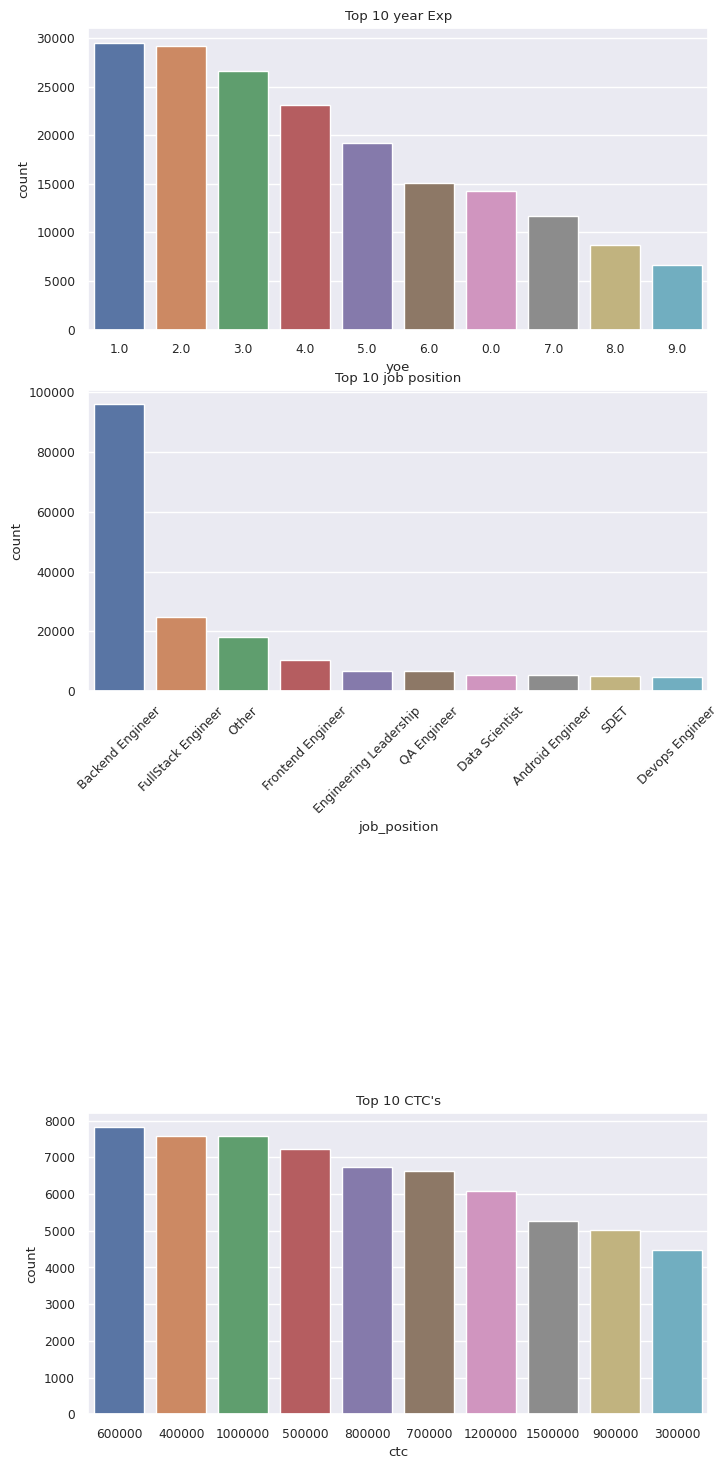

In [420]:
fig=plt.figure(figsize=(8,18))
sns.set(font_scale=0.8)
plt.subplot(4,1,1)
sns.set_style("darkgrid")
sns.countplot(x="yoe",order = df["yoe"].value_counts().index[0:10],data = df)
plt.title("Top 10 year Exp")

plt.subplot(4,1,2)
sns.set_style("darkgrid")
sns.countplot(x="job_position",order = df["job_position"].value_counts().index[0:10],data = df)
plt.title("Top 10 job position")
plt.xticks(rotation = 45)

plt.subplot(4,1,4)
sns.set_style("darkgrid")
sns.countplot(x="ctc",order = df["ctc"].value_counts().index[0:10],data = df)
plt.title("Top 10 CTC's")

Text(0.5, 1.0, 'Top 10 year Exp Tier wise')

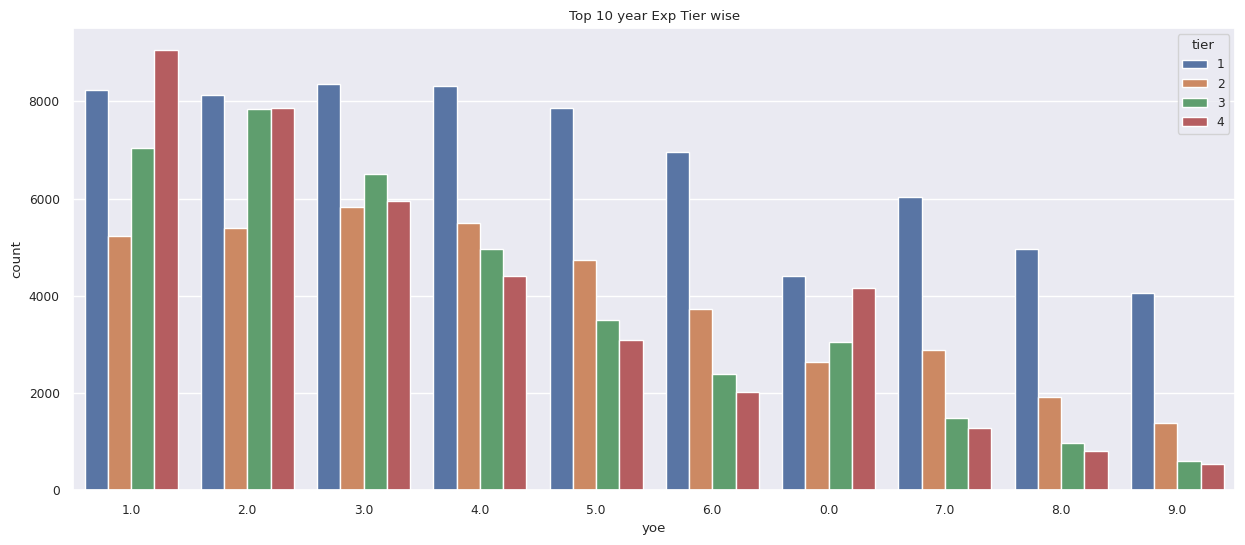

In [421]:
fig=plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x="yoe",order = df["yoe"].value_counts().index[0:10], hue ="tier", data = df)
plt.title("Top 10 year Exp Tier wise")

Employees in Tier 1 are increasing with years of experience and similar drop is observed in Tier 4 employees.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Backend Engineer'),
  Text(1, 0, 'FullStack Engineer'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Frontend Engineer'),
  Text(4, 0, 'Engineering Leadership'),
  Text(5, 0, 'QA Engineer'),
  Text(6, 0, 'Data Scientist'),
  Text(7, 0, 'Android Engineer'),
  Text(8, 0, 'SDET'),
  Text(9, 0, 'Devops Engineer')])

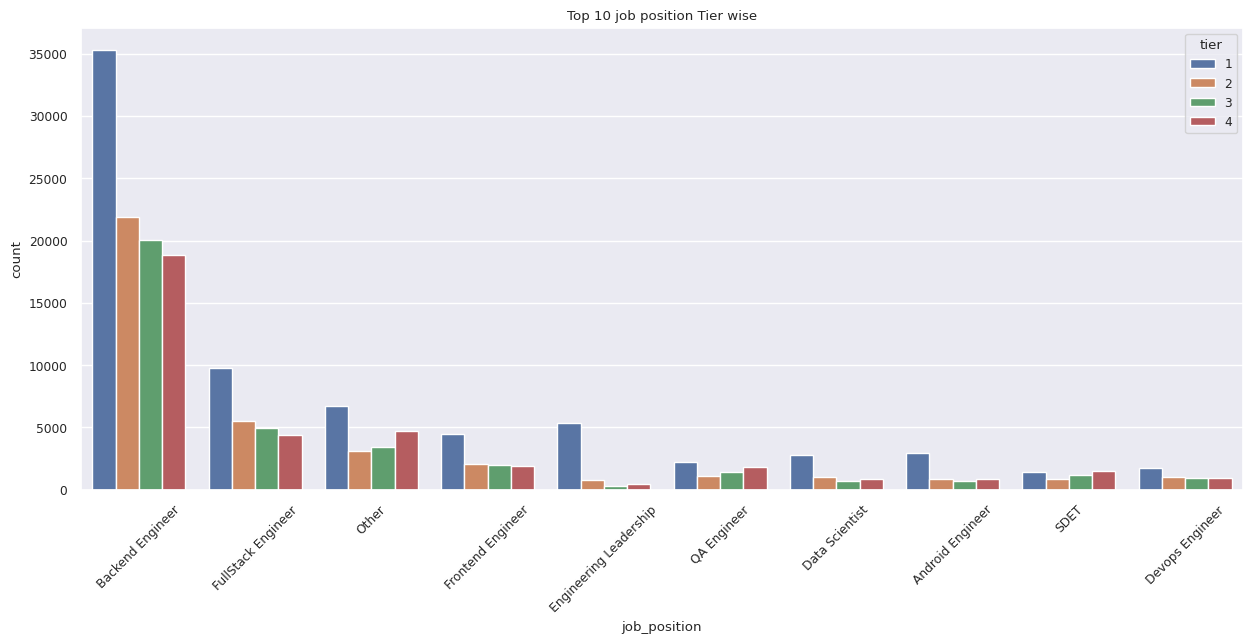

In [422]:
fig=plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x="job_position",order = df["job_position"].value_counts().index[0:10], hue  ="tier",data = df)
plt.title("Top 10 job position Tier wise")
plt.xticks(rotation = 45)



Text(0.5, 1.0, 'Top 10 ctc Tier wise')

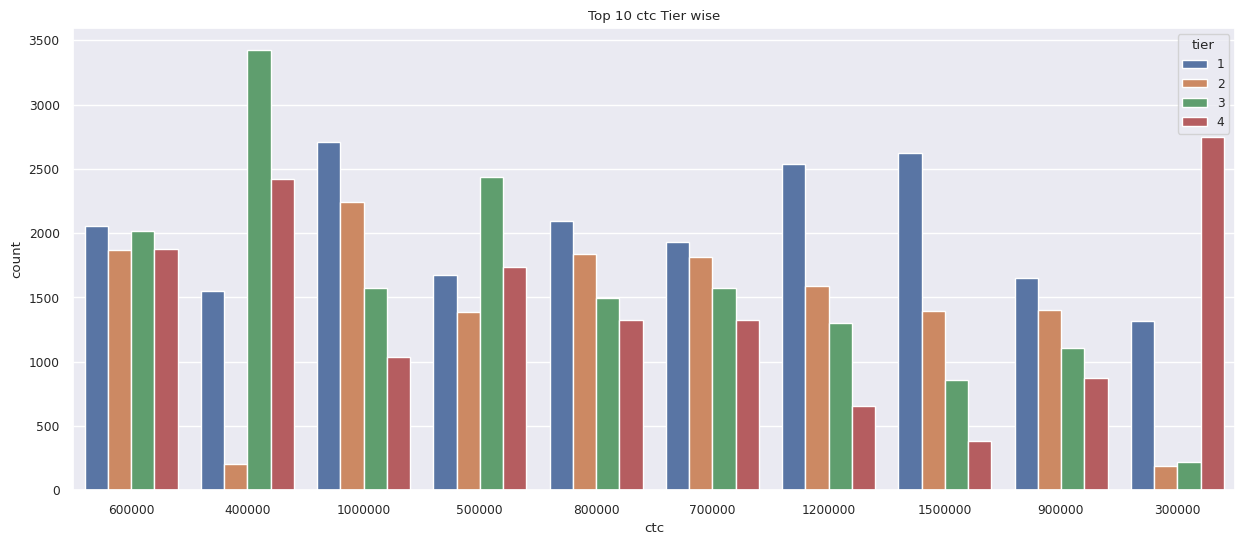

In [423]:
fig=plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x="ctc",order = df["ctc"].value_counts().index[0:10], hue ="tier",data= df)
plt.title("Top 10 ctc Tier wise")

Text(0.5, 1.0, 'Top 10 year Exp class wise')

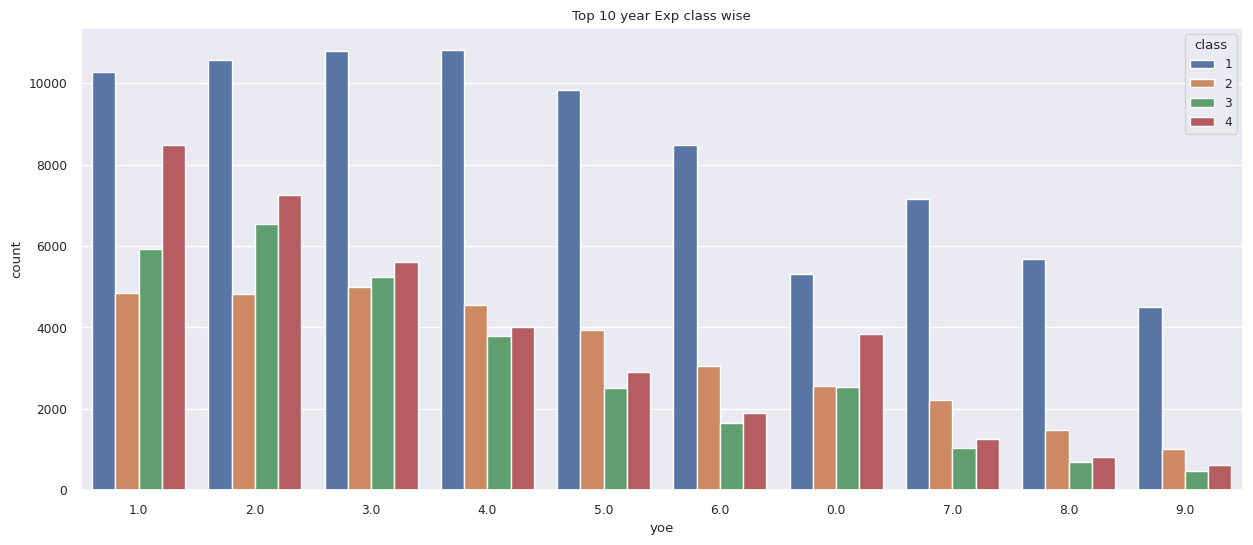

In [424]:
fig=plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x="yoe",order = df["yoe"].value_counts().index[0:10], hue ="class", data = df)
plt.title("Top 10 year Exp class wise")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Backend Engineer'),
  Text(1, 0, 'FullStack Engineer'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Frontend Engineer'),
  Text(4, 0, 'Engineering Leadership'),
  Text(5, 0, 'QA Engineer'),
  Text(6, 0, 'Data Scientist'),
  Text(7, 0, 'Android Engineer'),
  Text(8, 0, 'SDET'),
  Text(9, 0, 'Devops Engineer')])

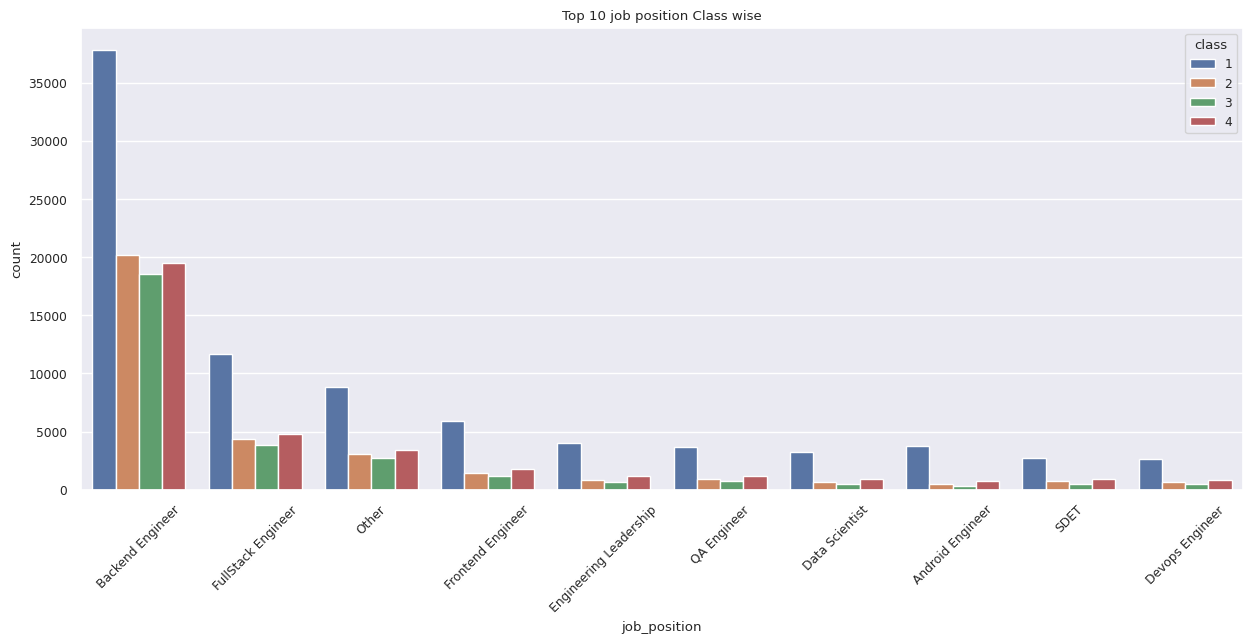

In [425]:
fig=plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x="job_position",order = df["job_position"].value_counts().index[0:10], hue  ="class",data = df)
plt.title("Top 10 job position Class wise")
plt.xticks(rotation = 45)



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '600000'),
  Text(1, 0, '400000'),
  Text(2, 0, '1000000'),
  Text(3, 0, '500000'),
  Text(4, 0, '800000'),
  Text(5, 0, '700000'),
  Text(6, 0, '1200000'),
  Text(7, 0, '1500000'),
  Text(8, 0, '900000'),
  Text(9, 0, '300000')])

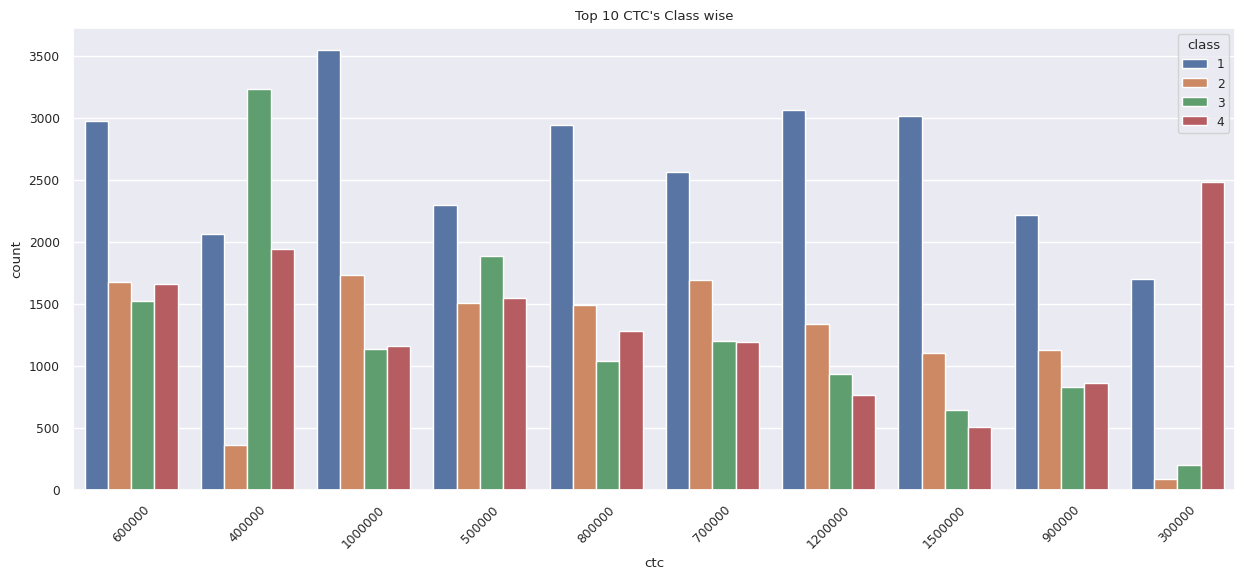

In [426]:
fig=plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x="ctc",order = df["ctc"].value_counts().index[0:10], hue  ="class",data = df)
plt.title("Top 10 CTC's Class wise")
plt.xticks(rotation = 45)



Data processing for Unsupervised clustering - Label encoding/ One- hot encoding, Standardization of data

In [427]:
df.drop(columns = ["email_hash"], inplace=True)

In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205650 entries, 0 to 205649
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205650 non-null  object 
 1   orgyear           205650 non-null  float64
 2   ctc               205650 non-null  int64  
 3   job_position      205650 non-null  object 
 4   ctc_updated_year  205650 non-null  float64
 5   yoe               205650 non-null  float64
 6   tier              205650 non-null  int64  
 7   class             205650 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 14.1+ MB


In [429]:
df.nunique()

company_hash        37258
orgyear                48
ctc                  3358
job_position         1005
ctc_updated_year        7
yoe                    36
tier                    4
class                   4
dtype: int64

In [430]:
df.corr()

<ipython-input-430-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,orgyear,ctc,ctc_updated_year,yoe,tier,class
orgyear,1.000000,-0.024259,0.212783,-0.948732,0.267389,0.229754
ctc,-0.024259,1.000000,0.014248,0.034938,-0.125123,-0.105617
ctc_updated_year,0.212783,0.014248,1.000000,0.072731,-0.052668,-0.035423
yoe,-0.948732,0.034938,0.072731,1.000000,-0.295289,-0.249853
tier,0.267389,-0.125123,-0.052668,-0.295289,1.000000,0.785382
class,0.229754,-0.105617,-0.035423,-0.249853,0.785382,1.000000


<ipython-input-431-c695716fe96a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='spearman'), annot=True,cmap="BrBG_r")


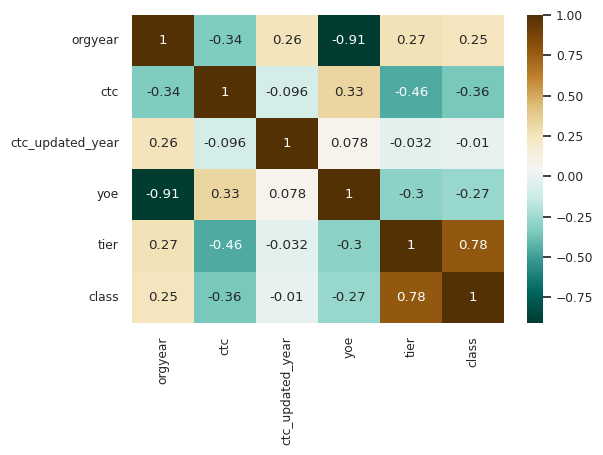

In [431]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(method='spearman'), annot=True,cmap="BrBG_r")
plt.show()

The correlation plot shows close correlation between the Tier and the Class of employees.

**ONE HOT ENCODING**


One hot encoding for so many values was crashing the code so I have added the frequency of the company_hash and job_position to make them numerical.

In [432]:
df_before = df.copy()

In [433]:
frequency_map1 = df['company_hash'].value_counts(normalize=True).to_dict()
frequency_map2 = df['job_position'].value_counts(normalize=True).to_dict()

# Map frequency values to comapny_hash and Job position
df['company_hash'] = df['company_hash'].map(frequency_map1)
df['job_position'] = df['job_position'].map(frequency_map2)
df["company_hash"].value_counts()

0.000005    23465
0.000010    13504
0.040530     8335
0.000015     6492
0.026166     5381
            ...  
0.000491      101
0.000486      100
0.000472       97
0.000374       77
0.000370       76
Name: company_hash, Length: 266, dtype: int64

**Outlier Detection & Removal**
There is a person with exceptionally high CTC and is affecting all the models badly so removing it.

In [434]:
max_ctc_index = df['ctc'].idxmax()
print(max_ctc_index)

df = df.drop(max_ctc_index)

72739


**Scaling & Normalization**

The data present is in all different ranges so before giving it to any ML model, scaling the data is very important.

In [435]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

# **KMeans Algorithm for Unsupervised ML model creation**

In this model, we have to tune the hyperparameter k. Using the Elbow (WCSS) method to do so.

In [437]:
from sklearn.cluster import KMeans
df_hierarchical = df.copy()
df_before_kmeans = df.copy()

Before applying the clustering techniques, I have removed the TIER and CLASS columns which were created for MANUAL CLUSTERING so that it doesn't impact our model.

In [439]:
df_before_kmeans.drop(columns = ["tier", "class"], inplace=True)

# Inertia = Within Cluster Sum of Squares
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_before_kmeans)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

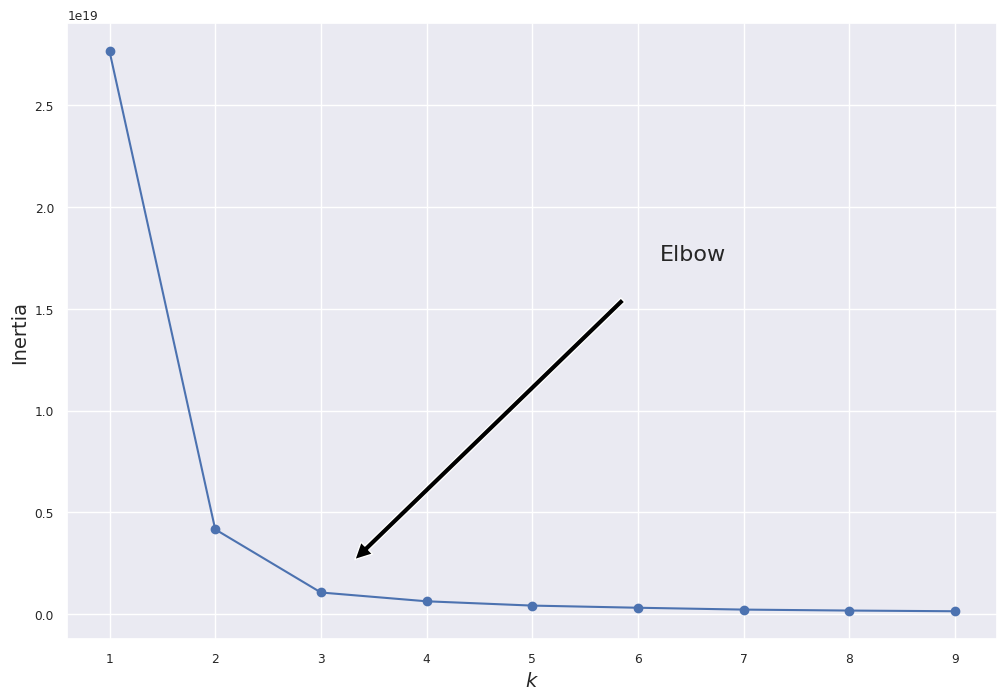

In [440]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

The elbow method tells us that we can go for k = 3 clusters. After that there is no significant change observed.

In [441]:
df_before_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205649 entries, 0 to 205649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205649 non-null  float64
 1   orgyear           205649 non-null  float64
 2   ctc               205649 non-null  int64  
 3   job_position      205649 non-null  float64
 4   ctc_updated_year  205649 non-null  float64
 5   yoe               205649 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 11.0 MB


In [442]:

# Specify the desired number of clusters
k = 3

# Create a KMeans object with k-means++ initialization
kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)  # Set random_state for reproducibility

# Fit the K-Means model to the data
kmeans.fit(df_before_kmeans)

# Get cluster labels for each data point
labels = kmeans.labels_

# Print the cluster labels
print(labels)

# Access other model attributes
print(kmeans.cluster_centers_)  # Cluster centers
print(kmeans.inertia_)         # Sum of squared distances to cluster centers

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]
[[4.70884757e-03 2.01511778e+03 1.35689048e+06 2.48786380e-01
  2.01962542e+03 4.62045165e+00]
 [4.71895027e-03 2.01530010e+03 9.12922290e+07 1.92562062e-01
  2.02010168e+03 5.12537019e+00]
 [5.09664478e-03 2.01611290e+03 1.94851725e+08 1.81218599e-01
  2.01986089e+03 4.11491935e+00]]
1.0579172416951013e+18


In [443]:
clusters = pd.DataFrame(df_before_kmeans, columns=df_before_kmeans.columns)
clusters['label'] = kmeans.labels_
clusters

,company_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,label
0,0.000044,2016.0,1100000,0.087790,2020.0,4.0,0
1,0.002081,2018.0,449999,0.120122,2019.0,1.0,0
2,0.000005,2015.0,2000000,0.466900,2020.0,5.0,0
3,0.000340,2017.0,700000,0.466900,2019.0,2.0,0
4,0.000029,2017.0,1400000,0.120122,2019.0,2.0,0
...,...,...,...,...,...,...,...
205645,0.000083,2008.0,220000,0.466900,2019.0,11.0,0
205646,0.000515,2017.0,500000,0.466900,2020.0,3.0,0
205647,0.000822,2021.0,700000,0.466900,2021.0,0.0,0
205648,0.005218,2019.0,5100000,0.466900,2019.0,0.0,0


In [444]:
clusters["label"].value_counts()

0    204140
1      1013
2       496
Name: label, dtype: int64

Insights
1. Cluster 0 have the maximum people and these are the people which should be targetted the most. These does not have high experience emplyoee's
2. Cluster 2 have the least no. of people and these does not have freshers emplyoee's

<Axes: xlabel='yoe', ylabel='ctc'>

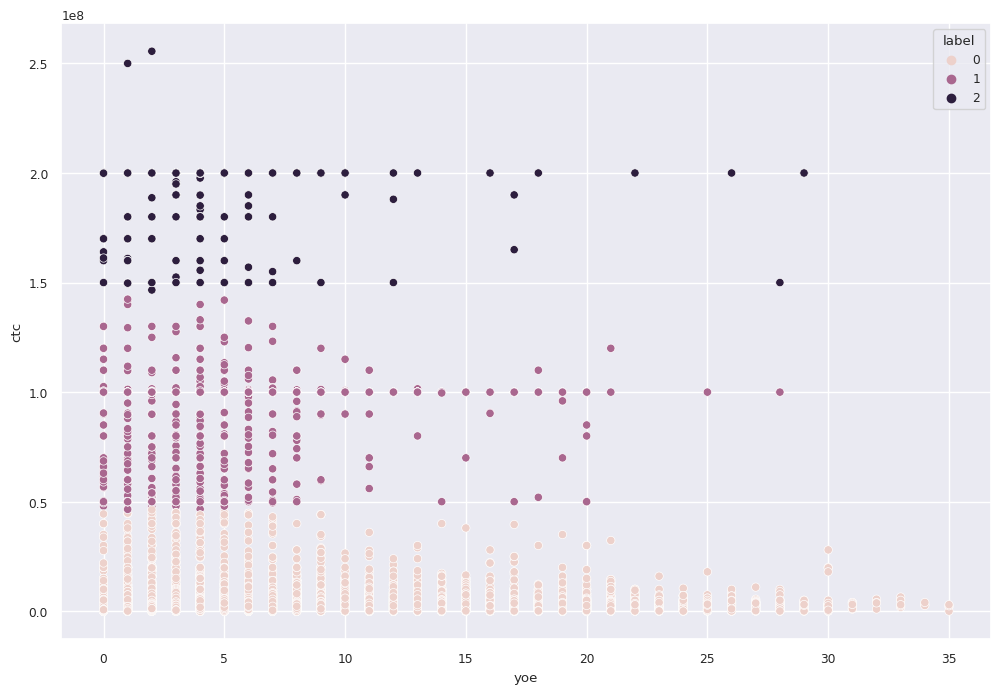

In [445]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=clusters, x="yoe", y="ctc", hue="label")

The plot above shows the distribution of people of Cluster 0 throughout. That means for all Year of experiecne values we have people with low CTC's.

Scaler can definetly target them and help them get good CTC's by working on their profile.

<Axes: xlabel='label'>

<Figure size 4000x3000 with 0 Axes>

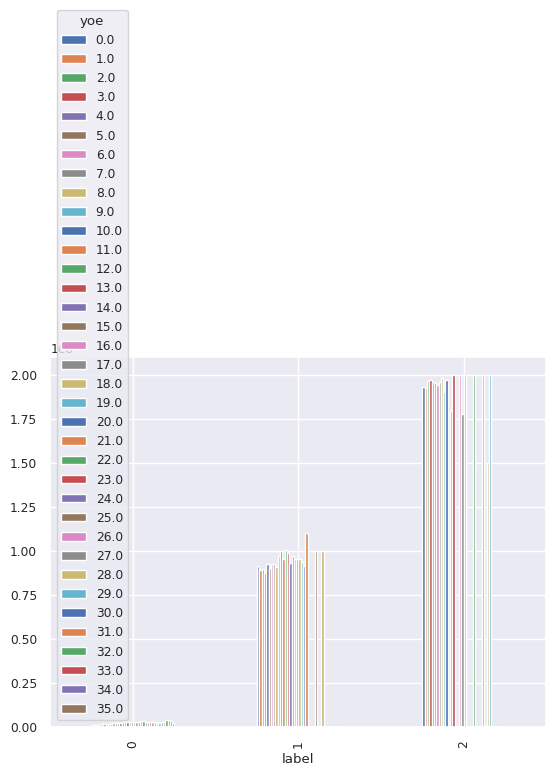

In [446]:
plt.figure(figsize=(40,30))
pd.crosstab(index = clusters["label"], columns = clusters["yoe"],values=clusters["ctc"],aggfunc= np.mean).plot(kind = "bar")

In [447]:
df.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'yoe', 'tier', 'class'],
      dtype='object')

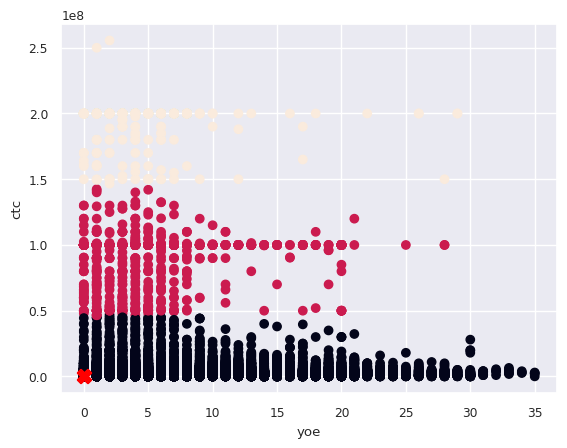

In [448]:
def viz_clusters(kmeans):
    plt.scatter(clusters['yoe'], clusters['ctc'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color="red",
                marker="X",
                s=100)
    plt.xlabel('yoe')
    plt.ylabel('ctc')

viz_clusters(kmeans)

In [449]:
df.describe()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,tier,class
count,205649.000000,205649.000000,2.056490e+05,205649.000000,205649.000000,205649.00000,205649.000000,205649.000000
mean,0.004710,2015.121080,2.266586e+06,0.248346,2019.628333,4.62172,2.183390,2.045539
std,0.009373,4.224597,1.159573e+07,0.206857,1.325229,4.02193,1.164672,1.178157
min,0.000005,1982.000000,2.000000e+00,0.000005,2015.000000,0.00000,1.000000,1.000000
25%,0.000029,2013.000000,5.300000e+05,0.033348,2019.000000,2.00000,1.000000,1.000000
50%,0.000428,2016.000000,9.500000e+05,0.120122,2020.000000,4.00000,2.000000,2.000000
75%,0.003890,2018.000000,1.700000e+06,0.466900,2021.000000,6.00000,3.000000,3.000000
max,0.040530,2031.000000,2.555556e+08,0.466900,2021.000000,35.00000,4.000000,4.000000


In [454]:
clusters.describe()

,company_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,label
count,205649.000000,205649.000000,2.056490e+05,205649.000000,205649.000000,205649.00000,205649.000000
mean,0.004710,2015.121080,2.266586e+06,0.248346,2019.628333,4.62172,0.009750
std,0.009373,4.224597,1.159573e+07,0.206857,1.325229,4.02193,0.120326
min,0.000005,1982.000000,2.000000e+00,0.000005,2015.000000,0.00000,0.000000
25%,0.000029,2013.000000,5.300000e+05,0.033348,2019.000000,2.00000,0.000000
50%,0.000428,2016.000000,9.500000e+05,0.120122,2020.000000,4.00000,0.000000
75%,0.003890,2018.000000,1.700000e+06,0.466900,2021.000000,6.00000,0.000000
max,0.040530,2031.000000,2.555556e+08,0.466900,2021.000000,35.00000,2.000000


<ipython-input-450-5d35306ca40b>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20").colors  # Choose any desired colormap
<ipython-input-450-5d35306ca40b>:18: UserWarning: Legend does not support handles for int instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(range(len(colors)), [f"Cluster {i + 1}" for i in range(len(colors))], title="Cluster")


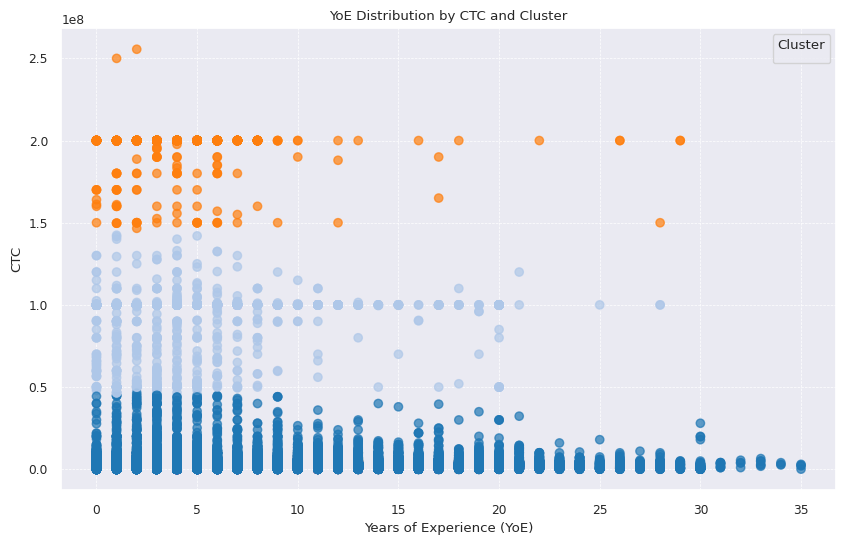

In [450]:
# Get cluster labels
cluster_labels = clusters["label"]  # Replace with your cluster labels column

# Create colors based on cluster labels
colors = plt.cm.get_cmap("tab20").colors  # Choose any desired colormap
company_colors = [colors[c] for c in cluster_labels]

# Plot the scatter points
plt.figure(figsize=(10, 6))
plt.scatter(clusters["yoe"], clusters["ctc"], c=company_colors, alpha=0.7)

# Add labels and title
plt.xlabel("Years of Experience (YoE)")
plt.ylabel("CTC")
plt.title("YoE Distribution by CTC and Cluster")

# Legend for cluster labels (optional)
plt.legend(range(len(colors)), [f"Cluster {i + 1}" for i in range(len(colors))], title="Cluster")

# Gridlines (optional)
plt.grid(True, linestyle="--", linewidth=0.5)

# Show the plot
plt.show()

In [451]:
clusters.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'yoe', 'label'],
      dtype='object')

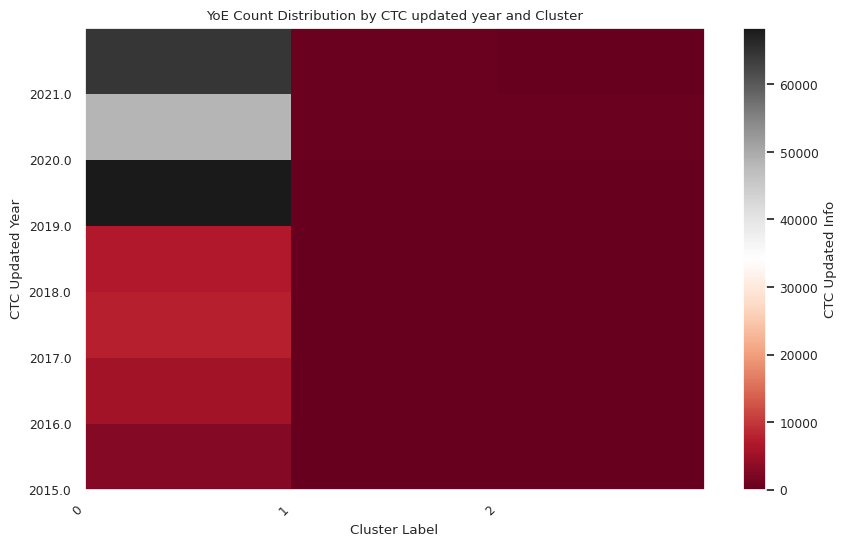

In [452]:
# Get cluster labels
cluster_labels = clusters["label"]  # Replace with your cluster labels column

# Create a pivot table for YoE count by company and cluster
yoe_counts = clusters.pivot_table(index="ctc_updated_year", columns="label", values="yoe", aggfunc="count")

# Create the heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.pcolor(yoe_counts, vmin=0, cmap="RdGy")  # Customize vmin and cmap as needed

# Add labels and title
plt.xlabel("Cluster Label")
plt.ylabel("CTC Updated Year")
plt.title("YoE Count Distribution by CTC updated year and Cluster")

# Colorbar
plt.colorbar(label="CTC Updated Info")

# Tick labels for companies and clusters
plt.xticks(range(len(yoe_counts.columns)), yoe_counts.columns, rotation=45, ha="right")
plt.yticks(range(len(yoe_counts.index)), yoe_counts.index)

# Gridlines (optional)
plt.grid(True, linestyle="--", linewidth=0.5)

# Show the heatmap
plt.show()

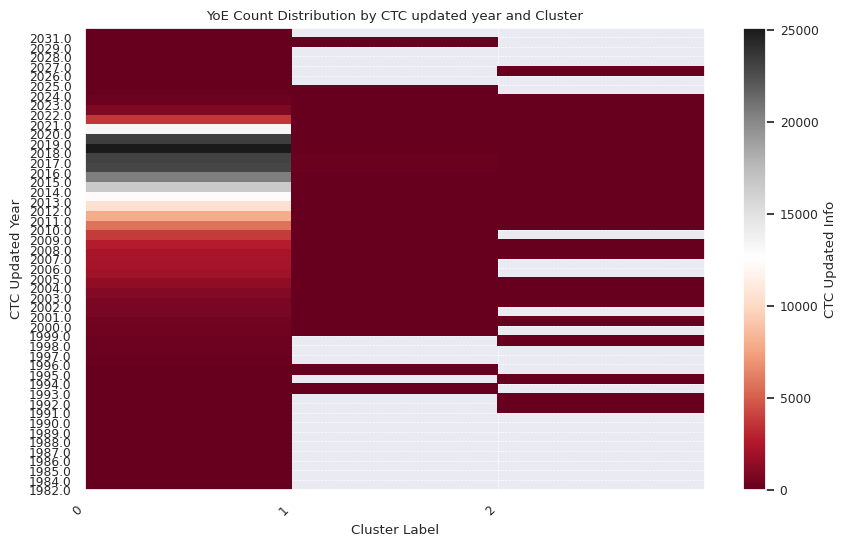

In [453]:
# Get cluster labels
cluster_labels = clusters["label"]  # Replace with your cluster labels column

# Create a pivot table for YoE count by company and cluster
yoe_counts = clusters.pivot_table(index="orgyear", columns="label", values="yoe", aggfunc="count")

# Create the heatmap
plt.figure(figsize=(10, 6))
heatmap = plt.pcolor(yoe_counts, vmin=0, cmap="RdGy")  # Customize vmin and cmap as needed

# Add labels and title
plt.xlabel("Cluster Label")
plt.ylabel("CTC Updated Year")
plt.title("YoE Count Distribution by CTC updated year and Cluster")

# Colorbar
plt.colorbar(label="CTC Updated Info")

# Tick labels for companies and clusters
plt.xticks(range(len(yoe_counts.columns)), yoe_counts.columns, rotation=45, ha="right")
plt.yticks(range(len(yoe_counts.index)), yoe_counts.index)

# Gridlines (optional)
plt.grid(True, linestyle="--", linewidth=0.5)

# Show the heatmap
plt.show()

The above plots, show the spread of people in different Clusters.

Cluster 0 is were we have maximum people and their CTC's are lower in comparision to people in cluster 2.

# **Hierarchical Clustering**

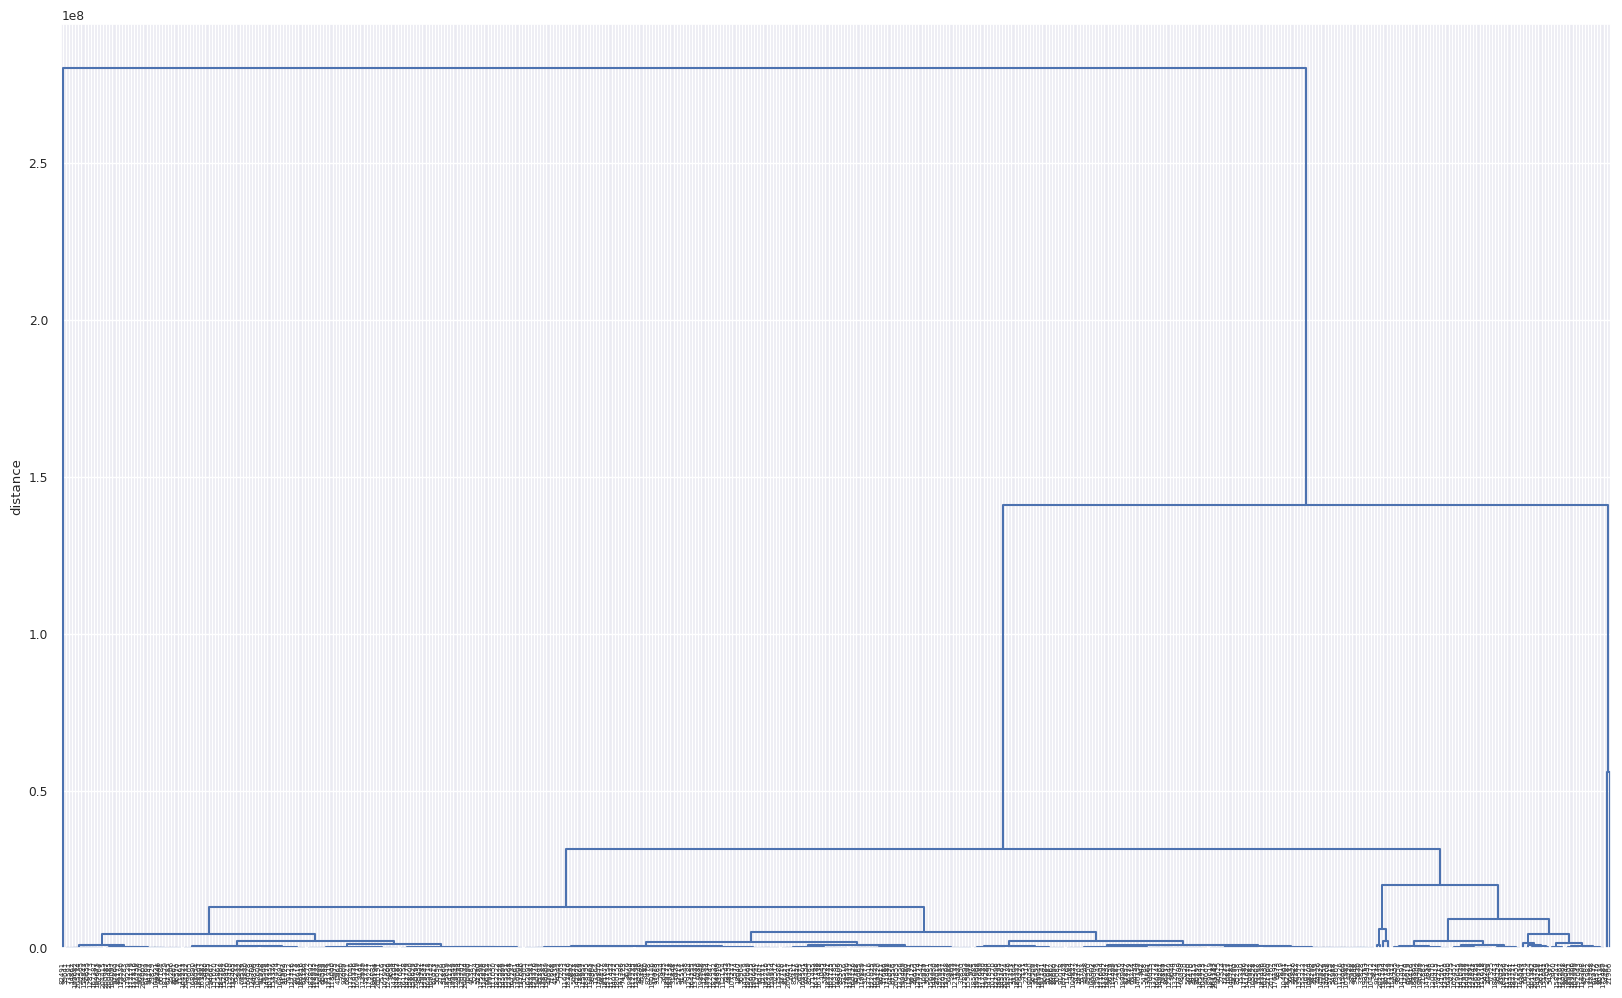

In [343]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
sample = df_hierarchical.sample(500)
Z = sch.linkage(sample, method='ward')
fig, ax1 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax1, color_threshold=2)
plt.xticks(rotation=90)
ax1.set_ylabel('distance')
plt.show()


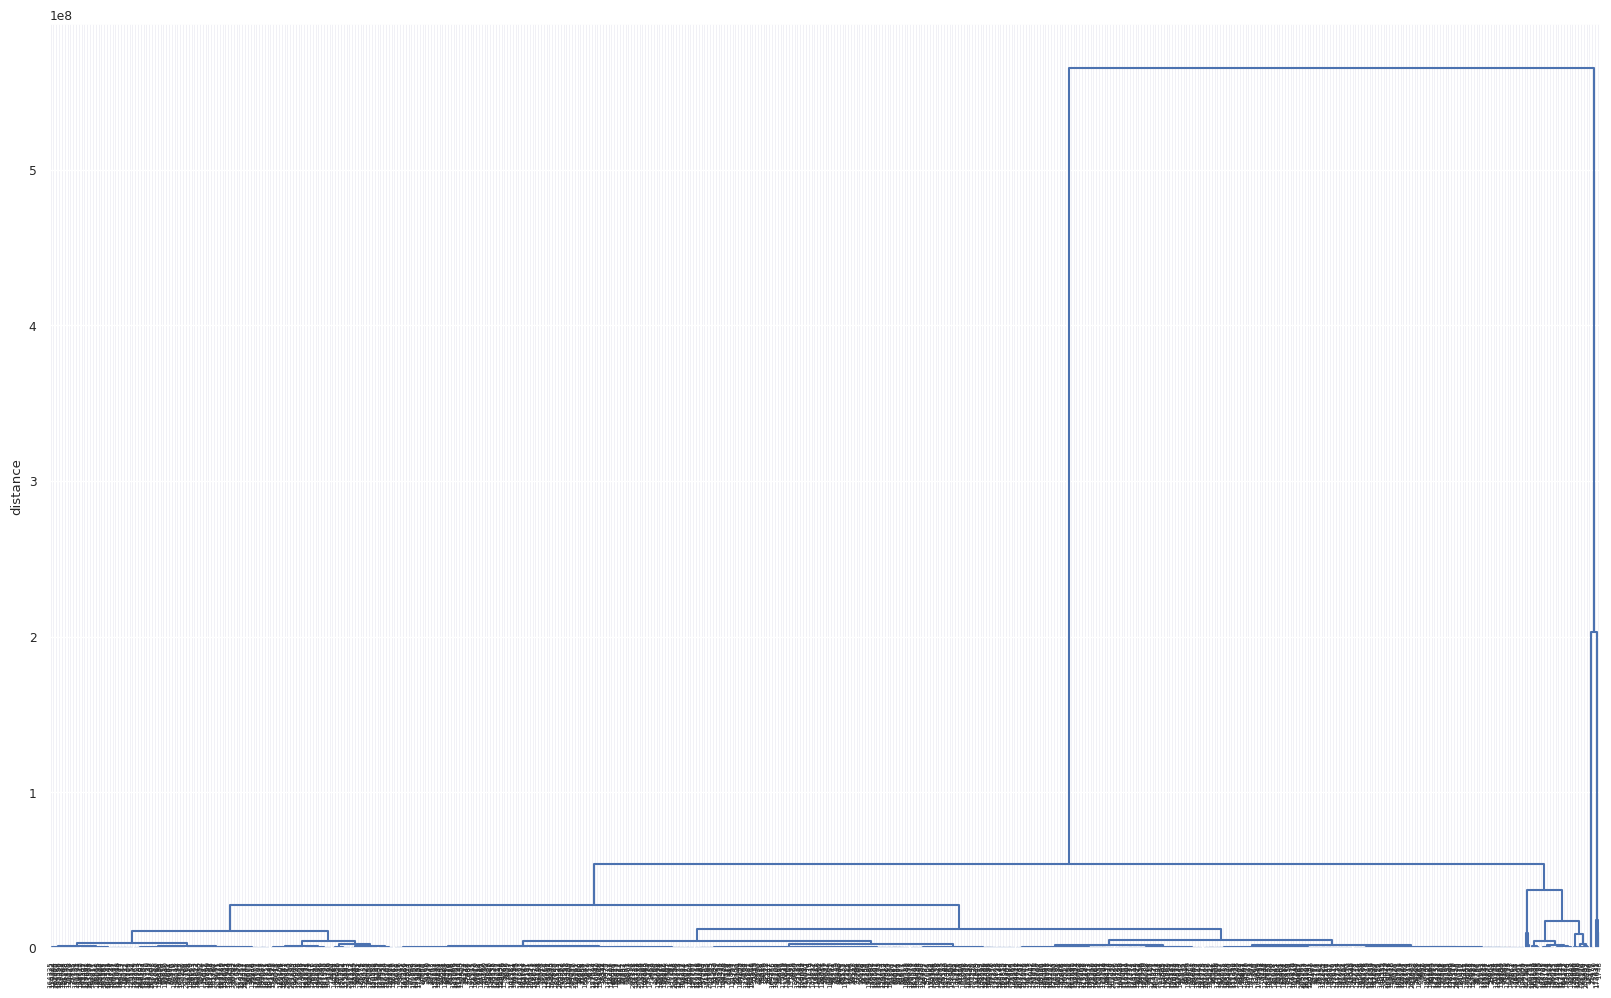

In [455]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
sample = df_hierarchical.sample(1000)
Z = sch.linkage(sample, method='ward')
fig, ax1 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax1, color_threshold=2)
plt.xticks(rotation=90)
ax1.set_ylabel('distance')
plt.show()


The dendogram also says that 2 or 3 clusters are there in this data.

We have found a similar pattern in manual clustering also.

# **CONCLUSION**
This casestudy was an Unsupervised ML model casestudy. Here, the task was to segment employees based on their profile - CTC, Years of experience, etc.
After performing manual clustering on 4 different clusters - 75%, 50-75%, 25-50% and less than 25% earning categories, found out lots of similarities between the people of same category.


Kmeans and Hierarchical clustering also strongly pointed out to having 3 clusters. We can describe the clusters as follows :


The Scaler dataset provided has 3 clusters -

Cluster 0 : People with low CTC in their company and across their job positions

Cluster 1 : People with higher CTC than their companies most of the other job positions

Cluster 2 : People with highest CTC in their company and job position and also when compared to the market


Scaler should be focusing most on Cluster 0 and can also lure Cluster 1 as both of these people aim to move to Cluster 2.

Cluster 0 is spread across all Years of experience so we have a huge market to attract.

CLuster 1 people are already earning more but if they switch to even better companies then for the same job position, they can earn more.

# **Actionable Insights & Recommendations**
1. Maximum users have years of experience in the range of 3-10 years. Scaler can target the
audience with experience 3 to 10 because mostly they were looking for a career change
or upskilling.
2. In data, email_hash are repeating data and should store one email_hash for the
individual users.
3. Maximum users have job_positions as full stack engineer or backed engineer, so scaler can target
more on these 2 job_position.
4. With company_hash we can see the high-paying
companies for the different job roles so the scaler can target the audience or advertise
with these data insights.
5. In orgyear most of the years are invalid so the system should give an error if the user
enters the wrong orgyear.
6. Scaler should show insights about the updated ctc and use
this as a marketing strategy to bring in more audience
7. Scaler can definetly target the people of Cluster - 2,i.e., the ones who are always in the low CTC range and help them get good CTC's by working on their profile. These people are available in all the year of experience bucket.